<a href="https://colab.research.google.com/github/Mahdi-N-13/security-adversarioal-dos-attack/blob/main/Implementing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import random as rn

# create the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.cluster import KMeans #one with clusterimg (disaster)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.dummy import DummyClassifier #that zero
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
from time import time
from sklearn.model_selection import train_test_split

print("WELLCOME TO IMPLEMENTATION")

WELLCOME TO IMPLEMENTATION


# working with data

In [2]:
try:
    # if usig drive
    data1 = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/benign_update_benign.csv")
    data2 = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/ddos_update_ddos.csv")
    data1['label'] = 'benign'
    data = data1.append(data2)
except:pass
try:
    # if using local data
    data1 = pd.read_csv("benign_update_benign.csv")
    data2 = pd.read_csv("ddos_update_ddos.csv")
    data1['label'] = 'benign'
    data = data1.append(data2)
except:pass
try:
    # if you dont have acces to drive nor local data
    data1 = pd.read_csv('https://github.com/rizzaesh/security-adversarioal-dos-attack/blob/main/Dataset/benign_update_benign.csv?raw=1')
    data2 = pd.read_csv('https://github.com/rizzaesh/security-adversarioal-dos-attack/blob/main/Dataset/ddos_update_ddos.csv?raw=1')
    data1['label'] = 'benign'
    data = data1.append(data2)
except:pass
try:
    data.head()
except:print("there is no data")

# working with models Step 1

In [3]:
from tensorflow import keras as ks
NN = ks.Sequential()
NN.add(ks.layers.Dense(10, activation=ks.activations.relu, input_dim = len(data.iloc[0])-1)  )
NN.add(ks.layers.Dense(8, activation=ks.activations.relu)  )
NN.add(ks.layers.Dense(5, activation=ks.activations.relu)  )
NN.add(ks.layers.Dense(2, activation=ks.activations.sigmoid)  )
NN.compile(optimizer='adam',
            loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [10]:
y_tes

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [11]:
model_list = [DecisionTreeClassifier(),RandomForestClassifier(), KNeighborsClassifier(),  OneVsRestClassifier(estimator = SVC()), DummyClassifier(strategy="most_frequent"), SVC(), GaussianNB()]
print("\nMODELS IMPLEMENTING ... \n")
# %%time
avg_num = 5 #we do this code avg_num times and then get an average
# data_num = 5000 # number of item for data
duration_fit_list=[]
duration_pred_list=[]
accuracy_score_list=[]
weighted_precision_score_list=[]
weighted_recall_score_list=[]
weighted_f1_score_list=[]
data_clean = data
for model in model_list:
  clf = model
  print(f"this model: {model}")
  duration_fit=0
  duration_pred=0
  accuracy_scores = 0
  weighted_precision_scores = 0
  weighted_recall_scores = 0
  weighted_f1_scores = 0

  for n in range(avg_num):
    sample_data = data_clean.sample(2500)
    X = sample_data.drop('label', axis = 1)
    Y = sample_data['label']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    # %time
    start_fit = time()
    clf.fit(X_train,Y_train)
    end_fit = time()
    duration_fit += end_fit - start_fit 
    # %time
    start_pred = time()
    Y_pred = clf.predict(X_test)
    end_pred = time()
    duration_pred += end_pred - start_pred

    accuracy_scores += round(accuracy_score(Y_test, Y_pred),4)
    weighted_precision_scores += round(precision_score(Y_test, Y_pred, average='weighted',zero_division=1), 4)
    weighted_recall_scores += round(recall_score(Y_test, Y_pred, average='weighted'), 4)
    weighted_f1_scores += round(f1_score(Y_test, Y_pred, average='weighted'), 4)
    
  duration_fit_list.append(duration_fit/avg_num)
  duration_pred_list.append(duration_pred/avg_num)
  accuracy_score_list.append(accuracy_scores/avg_num)
  weighted_precision_score_list.append(weighted_precision_scores/avg_num)
  weighted_recall_score_list.append(weighted_recall_scores/avg_num)
  weighted_f1_score_list.append(weighted_f1_scores/avg_num)

duration_fit=0
duration_pred=0
accuracy_scores = 0
weighted_precision_scores = 0
weighted_recall_scores = 0
weighted_f1_scores = 0

for n in range(avg_num):
  sample_data = data_clean.sample(2500)
  X = sample_data.drop('label', axis = 1)
  Y = sample_data['label']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
  y_tes = np.array(Y_test=='ddos').astype(int)
  y_tra = np.array(Y_train=='ddos').astype(int)
  # %time
  start_fit = time()
  NN.fit(X_train,y_tra,epochs=30)
  end_fit = time()
  duration_fit += end_fit - start_fit 
  # %time
  start_pred = time()
  Y_pred = np.argsort(NN.predict(X_test))[:,1]
  end_pred = time()
  duration_pred += end_pred - start_pred

  accuracy_scores += round(accuracy_score(y_tes, Y_pred),4)
  weighted_precision_scores += round(precision_score(y_tes, Y_pred, average='weighted',zero_division=1), 4)
  weighted_recall_scores += round(recall_score(y_tes, Y_pred, average='weighted'), 4)
  weighted_f1_scores += round(f1_score(y_tes, Y_pred, average='weighted'), 4)
  
duration_fit_list.append(duration_fit/avg_num)
duration_pred_list.append(duration_pred/avg_num)
accuracy_score_list.append(accuracy_scores/avg_num)
weighted_precision_score_list.append(weighted_precision_scores/avg_num)
weighted_recall_score_list.append(weighted_recall_scores/avg_num)
weighted_f1_score_list.append(weighted_f1_scores/avg_num)

model_list_name = list(str(i) for i in model_list) # a list for the names of models
model_list_name.append("Sequential Neural Network(10,8,5)")
report_data = pd.DataFrame(model_list_name, columns=['model'])
report_data['fit_duration'] = duration_fit_list
report_data['pred_duration'] = duration_pred_list
report_data['accuracy'] = accuracy_score_list
report_data['weighted_precision'] = weighted_precision_score_list
report_data['weighted_recall'] = weighted_recall_score_list
report_data['weighted_f1_score'] = weighted_f1_score_list

report_data



MODELS IMPLEMENTING ... 

this model: DecisionTreeClassifier()
this model: RandomForestClassifier()
this model: KNeighborsClassifier()
this model: OneVsRestClassifier(estimator=SVC())
this model: DummyClassifier(strategy='most_frequent')
this model: SVC()
this model: GaussianNB()
Epoch 1/30
59/59 [==============================] - 0s 5ms/step - loss: 18498.2617 - accuracy: 0.6891
Epoch 2/30
59/59 [==============================] - 0s 6ms/step - loss: 12425.2637 - accuracy: 0.6939
Epoch 3/30
59/59 [==============================] - 0s 4ms/step - loss: 7518.1426 - accuracy: 0.7264
Epoch 4/30
59/59 [==============================] - 0s 4ms/step - loss: 15417.4648 - accuracy: 0.6933
Epoch 5/30
59/59 [==============================] - 0s 5ms/step - loss: 15527.6328 - accuracy: 0.6832
Epoch 6/30
59/59 [==============================] - 0s 4ms/step - loss: 12171.2676 - accuracy: 0.6965
Epoch 7/30
59/59 [==============================] - 0s 5ms/step - loss: 10100.5859 - accuracy: 0.7339
Epoch

,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,DecisionTreeClassifier(),0.016134,0.004097,0.99680,0.99682,0.99680,0.99680
1,RandomForestClassifier(),0.492337,0.040801,0.99616,0.99620,0.99616,0.99616
2,KNeighborsClassifier(),0.009206,0.106346,0.99680,0.99682,0.99680,0.99680
3,OneVsRestClassifier(estimator=SVC()),0.324671,0.134663,0.65728,0.73378,0.65728,0.55420
4,DummyClassifier(strategy='most_frequent'),0.001352,0.000146,0.60768,0.76188,0.60768,0.45952
5,SVC(),0.316239,0.141063,0.64448,0.73826,0.64448,0.54064
6,GaussianNB(),0.007098,0.003030,0.99648,0.99652,0.99648,0.99648
7,"Sequential Neural Network(10,8,5)",7.254331,0.230737,0.65632,0.74728,0.65632,0.55614


# working with data Step2

this code shows the number of unique instance each feature has

In [ ]:
safe = data['label'] == 'benign'
attc = data['label'] == 'ddos'
l = []
for f in range(len(data.iloc[0])):
  print(data.columns[f],len(set(data.iloc[:,f])))
  if len(set(data.iloc[:,f])) == 1:
    print(set(data.iloc[:,f]))
    # print('\n')
  else:
    l.append(data.columns[f])
data = data[l]
del l

ip.src 3
ip.dst 4
ip.len 10
ip.flags.df 2
ip.flags.mf 2
ip.fragment 596
ip.fragment.count 2
ip.fragments 1
{0.0}
ip.ttl 2
ip.proto 4
tcp.window_size 6
tcp.ack 6
tcp.seq 5
tcp.len 3
tcp.stream 110
tcp.urgent_pointer 1
{0.0}
tcp.flags 6
tcp.analysis.ack_rtt 133
tcp.segments 1
{0.0}
tcp.reassembled.length 1
{0.0}
http.request 2
udp.port 3
frame.time_relative 3089
frame.time_delta 599
tcp.time_relative 414
tcp.time_delta 214
label 2


scatter matrix for features

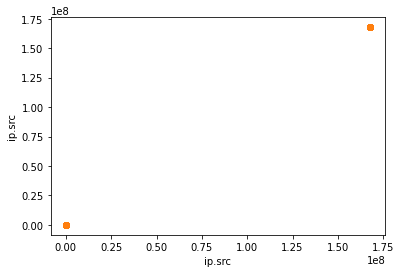

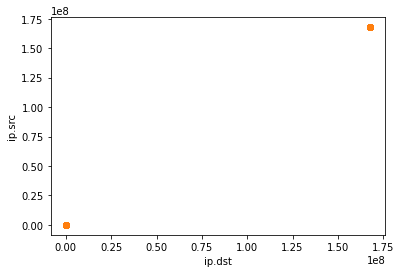

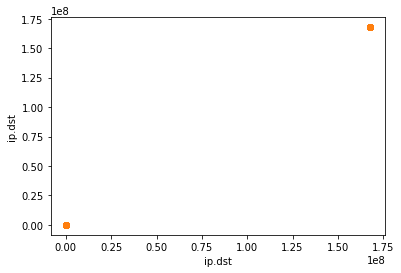

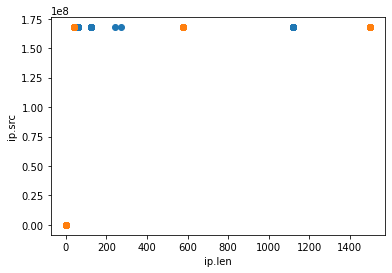

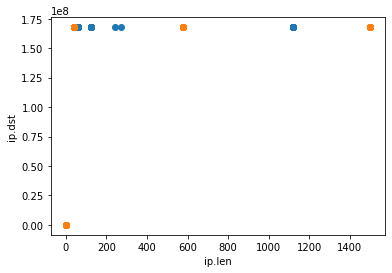

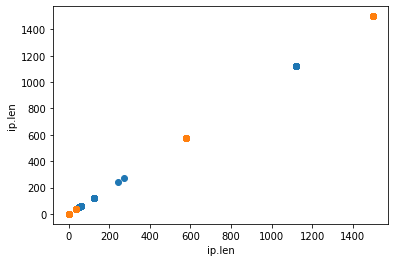

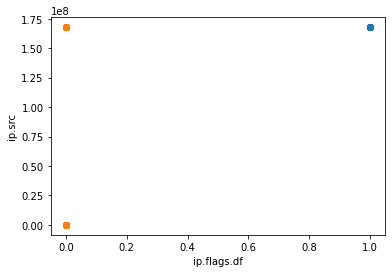

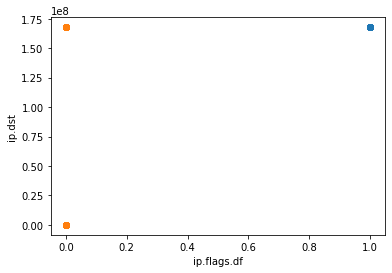

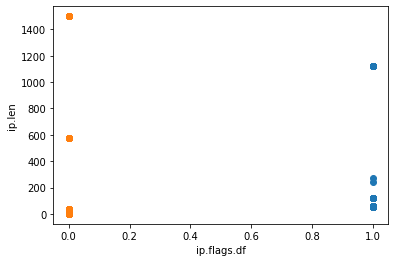

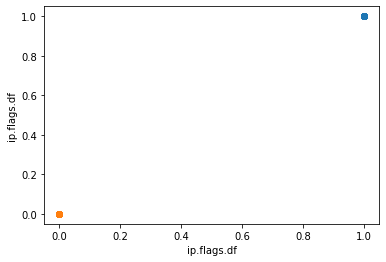

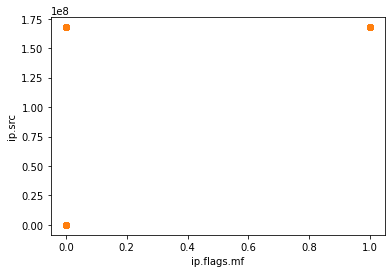

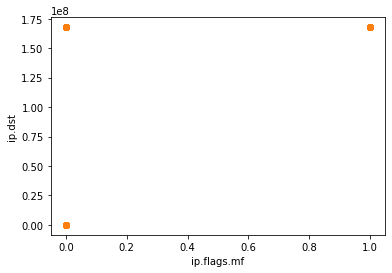

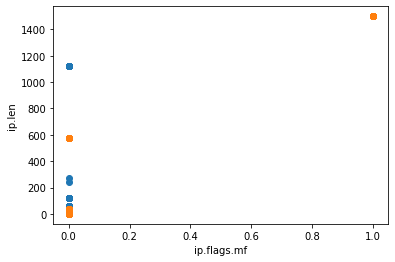

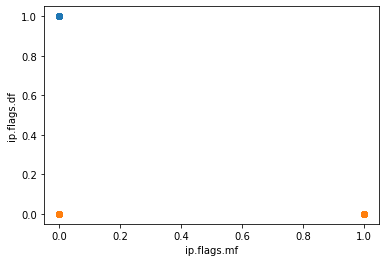

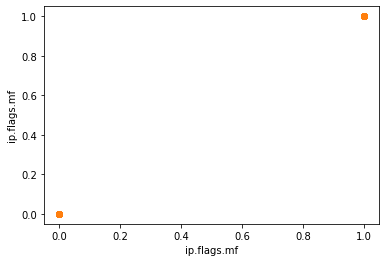

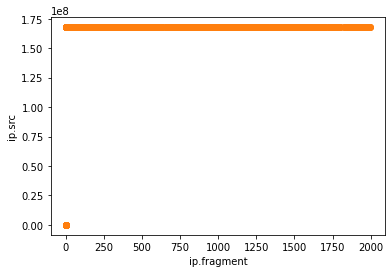

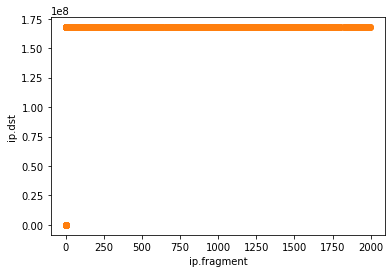

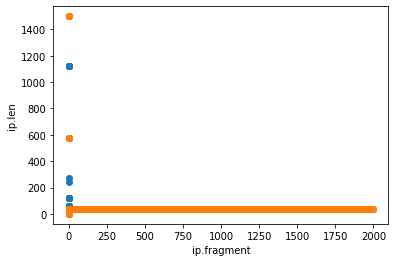

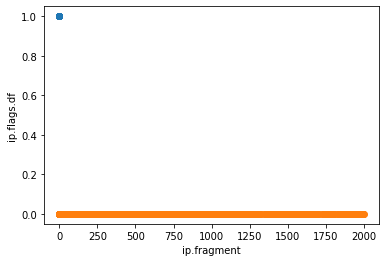

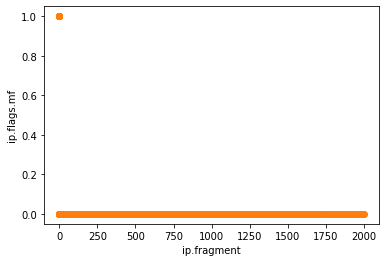

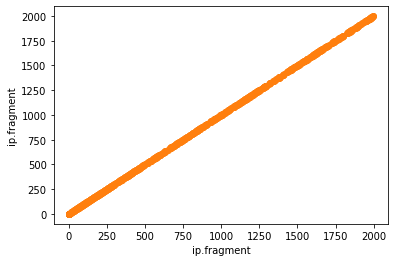

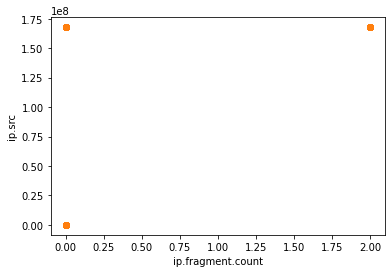

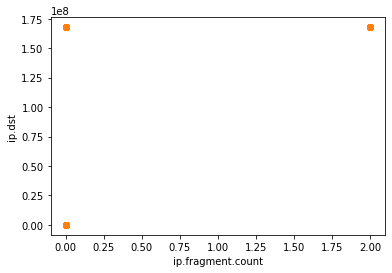

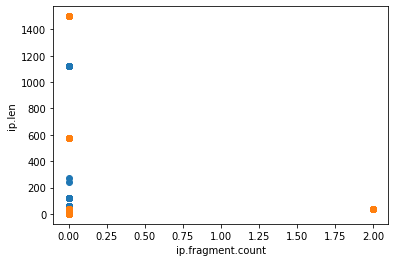

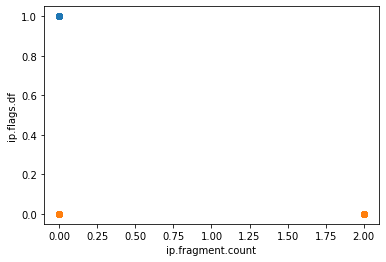

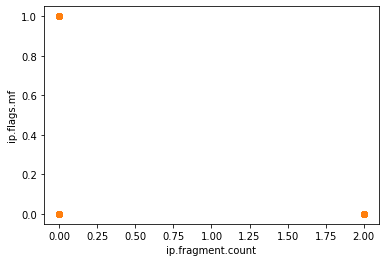

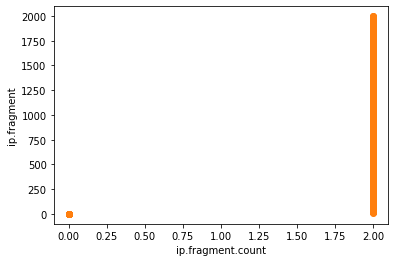

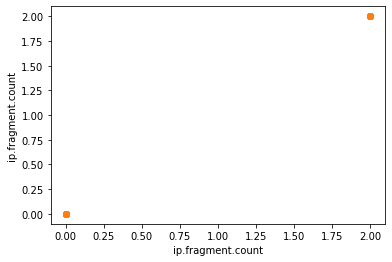

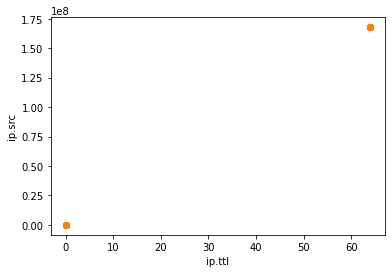

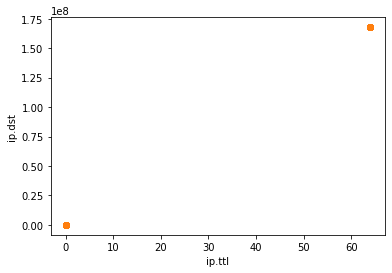

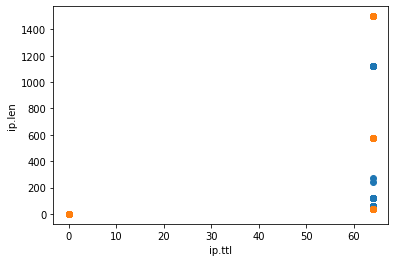

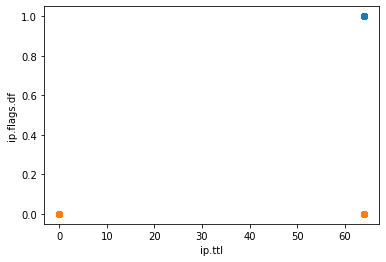

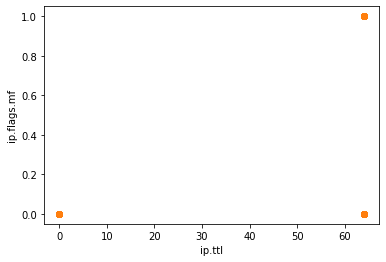

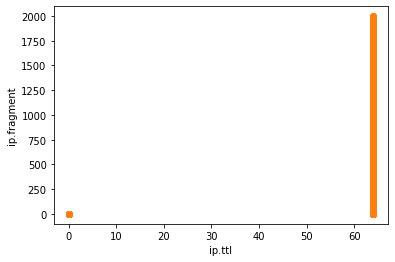

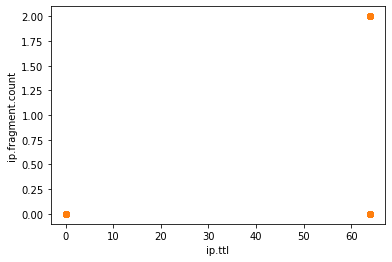

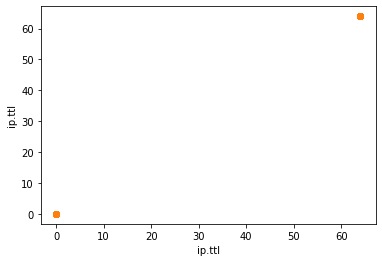

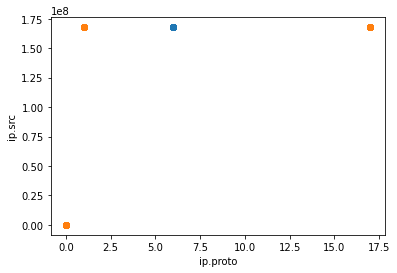

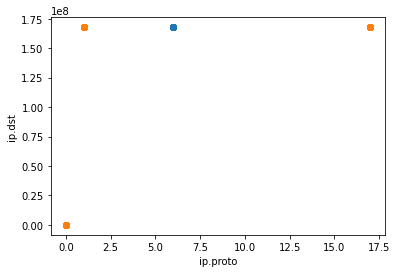

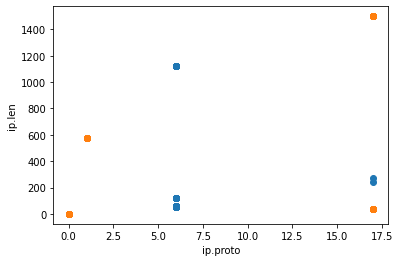

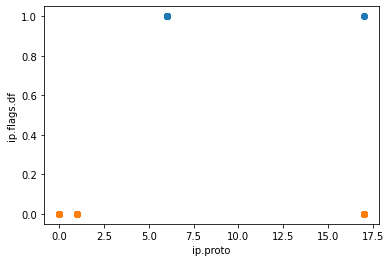

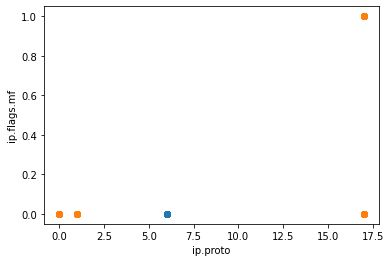

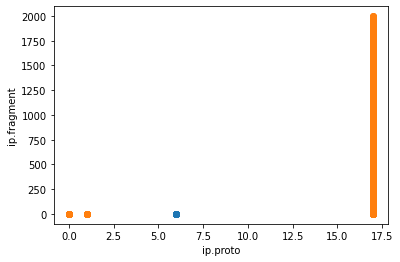

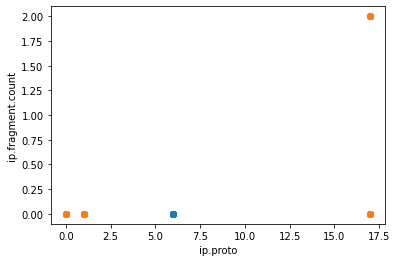

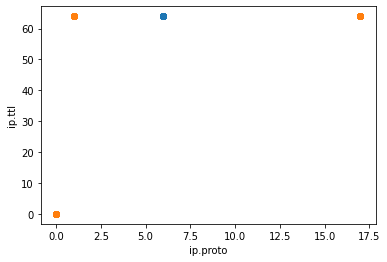

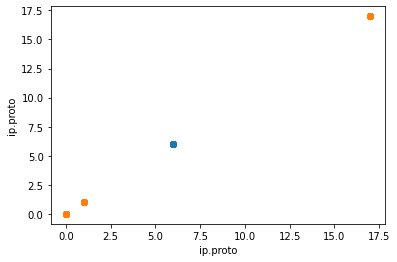

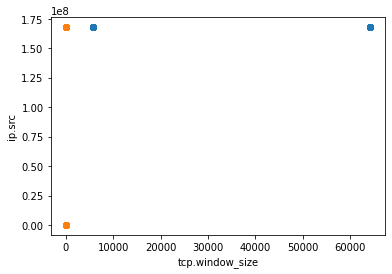

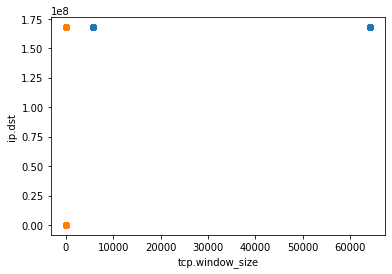

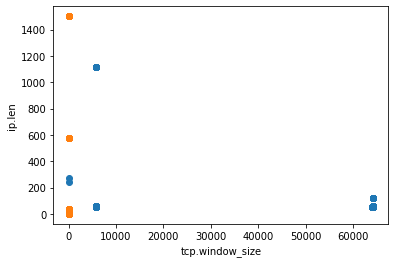

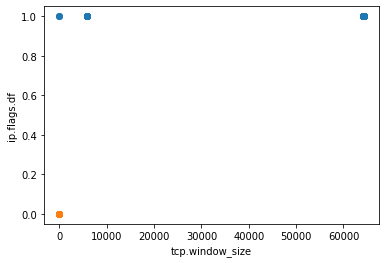

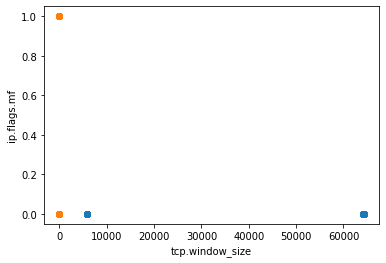

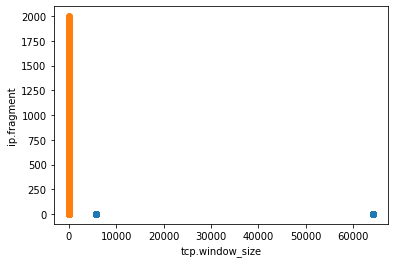

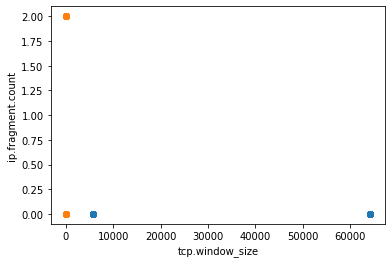

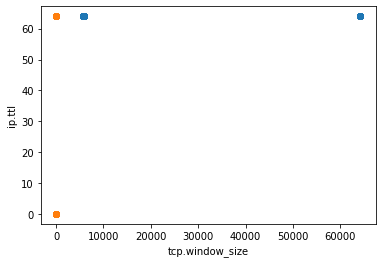

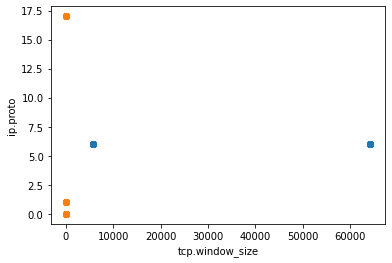

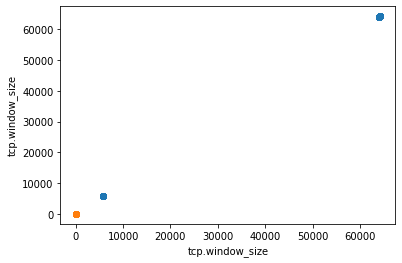

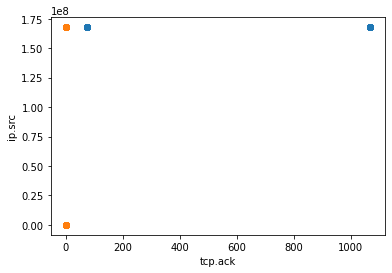

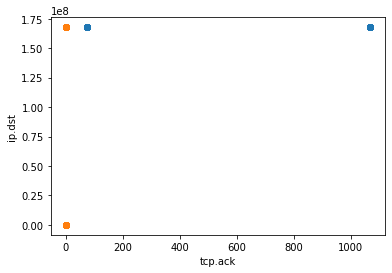

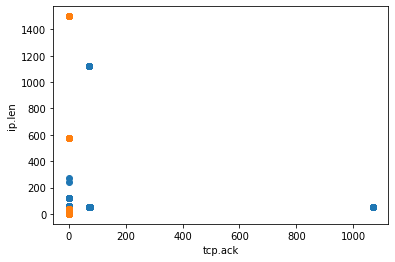

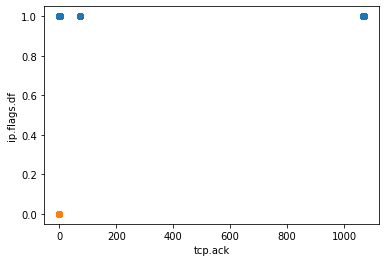

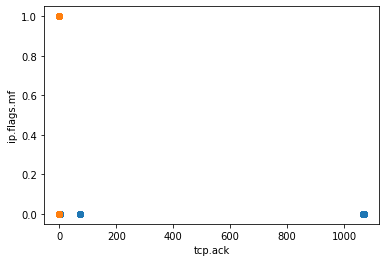

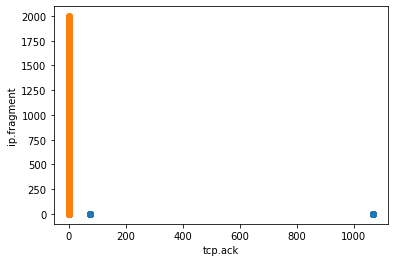

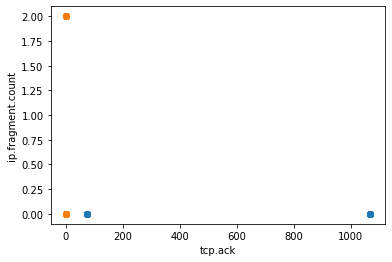

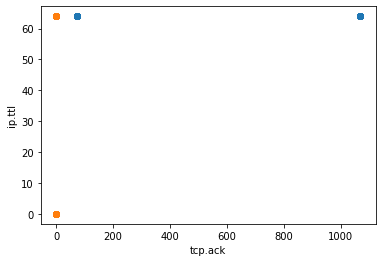

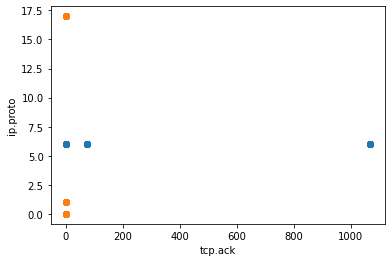

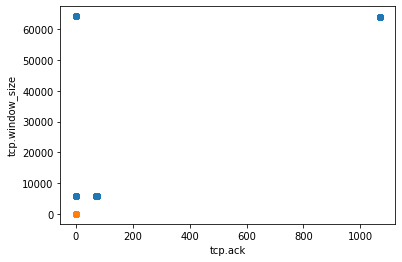

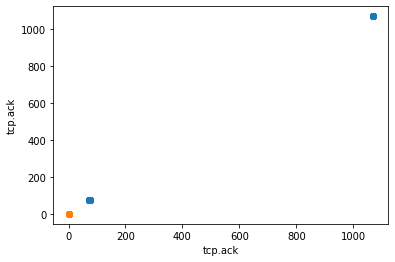

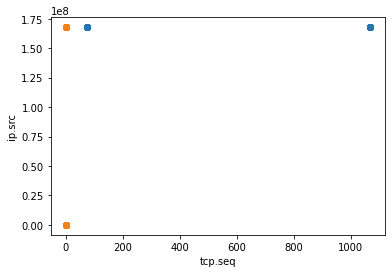

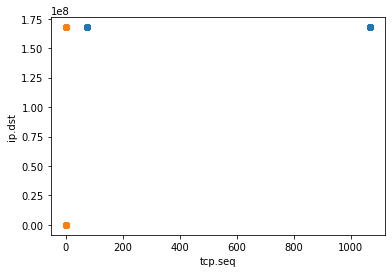

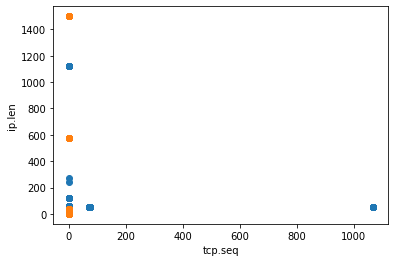

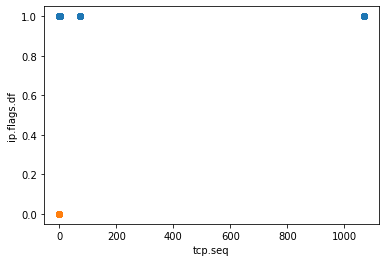

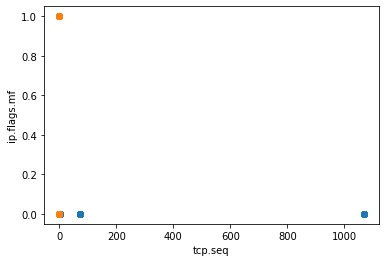

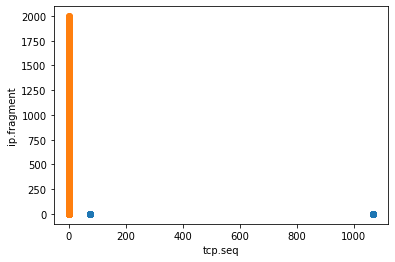

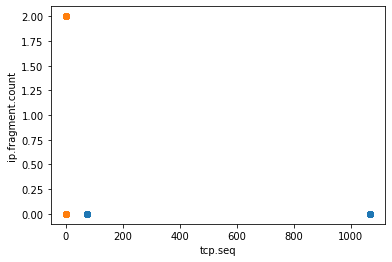

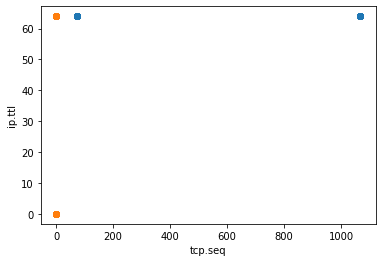

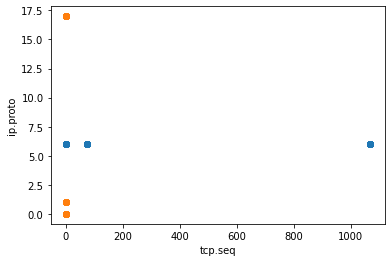

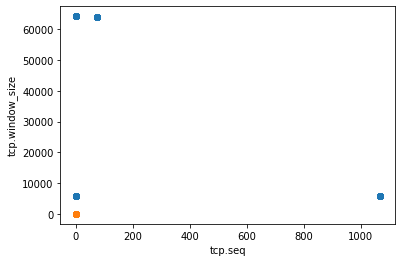

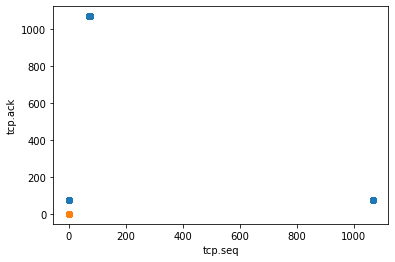

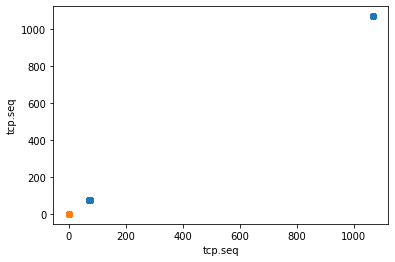

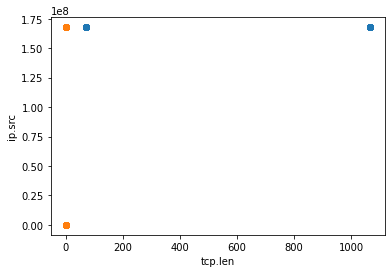

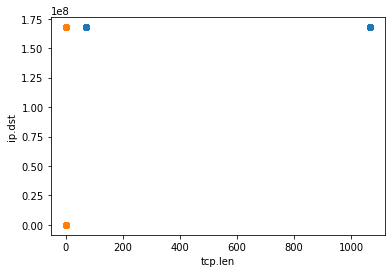

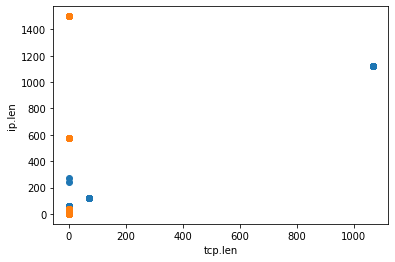

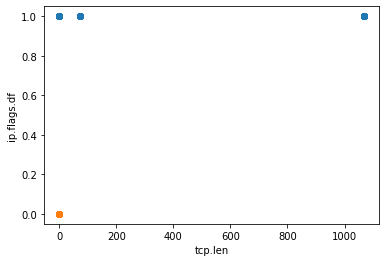

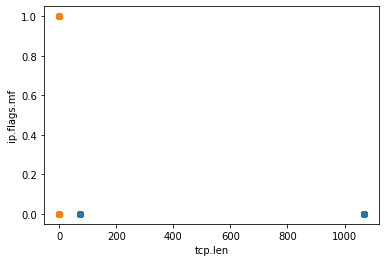

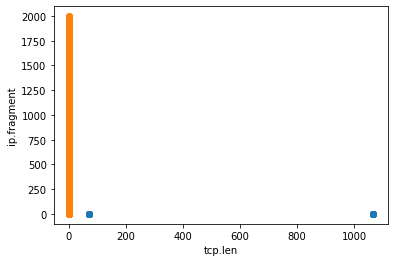

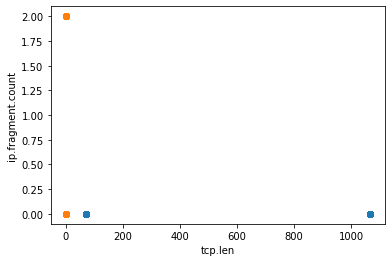

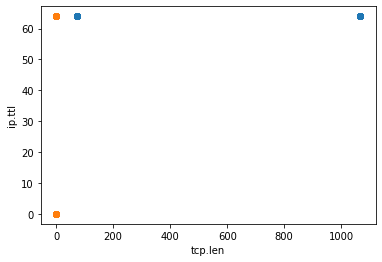

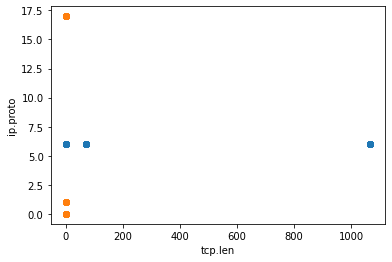

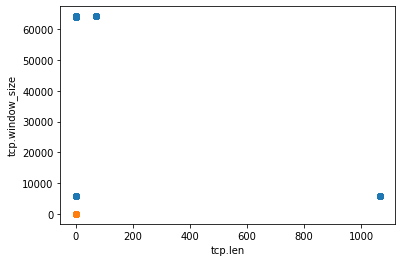

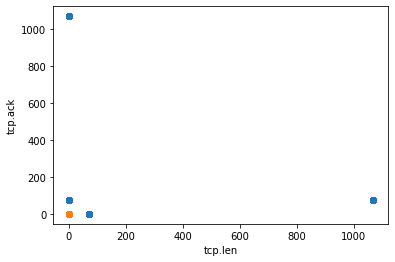

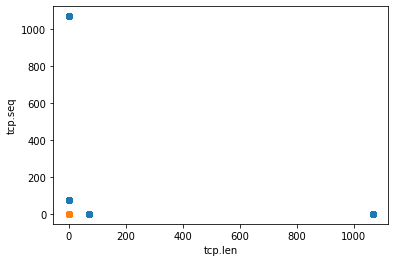

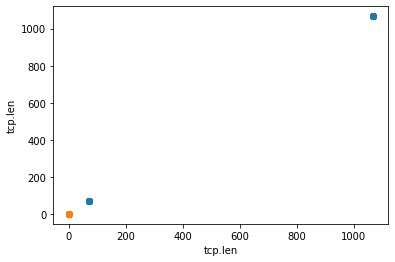

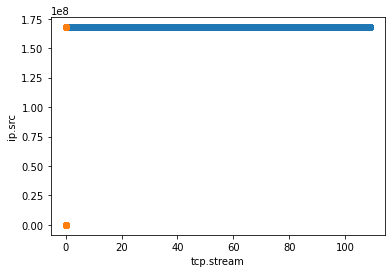

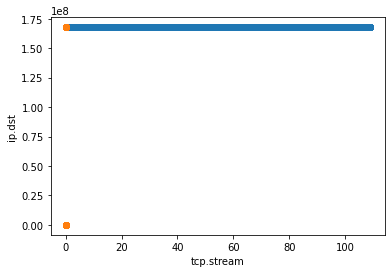

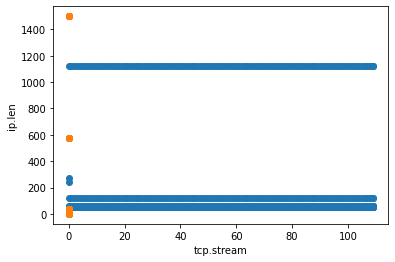

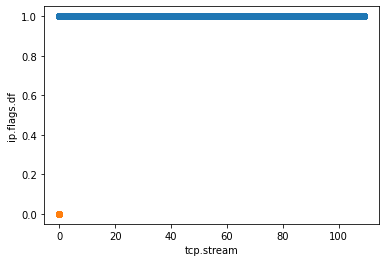

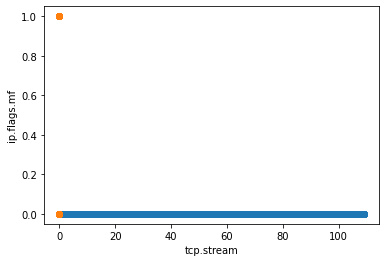

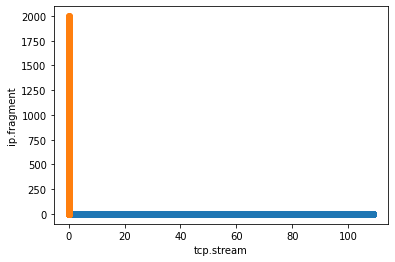

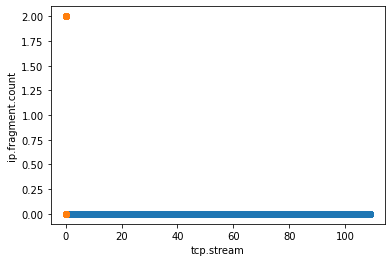

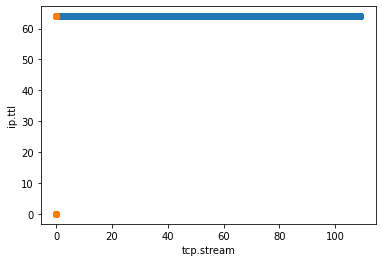

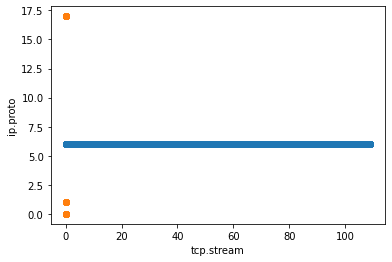

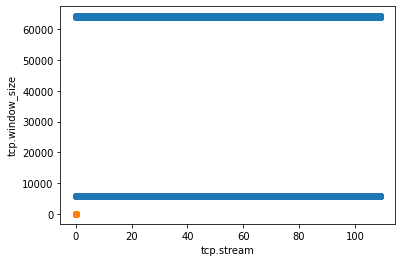

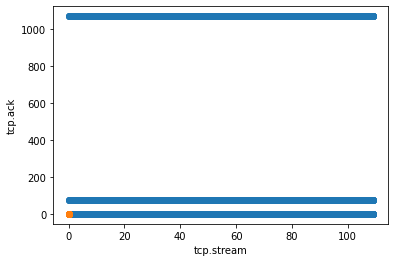

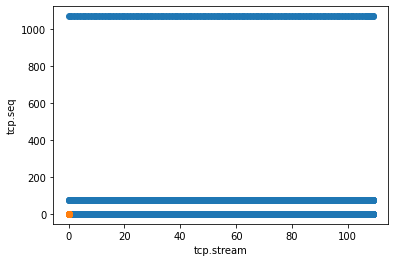

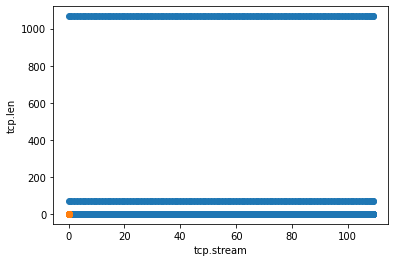

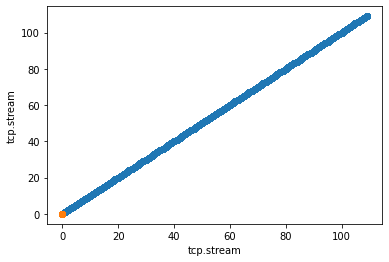

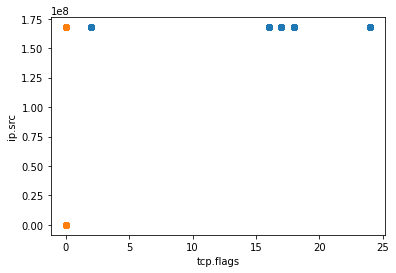

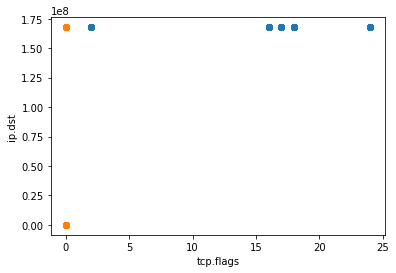

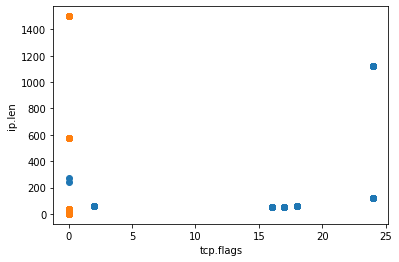

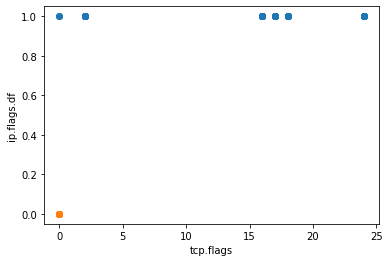

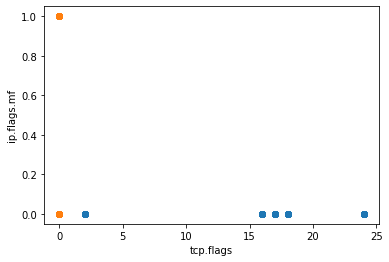

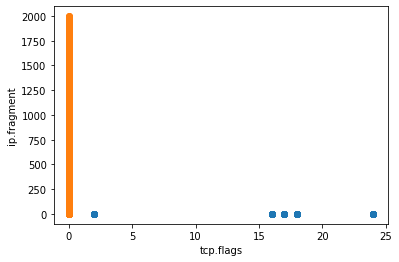

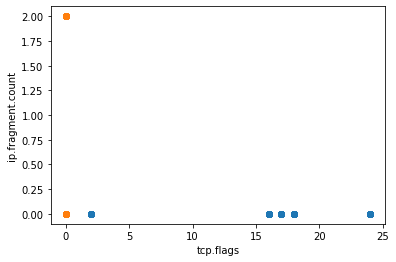

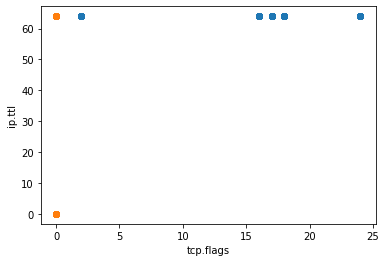

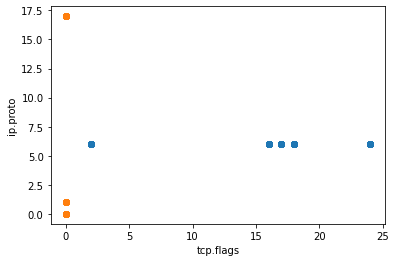

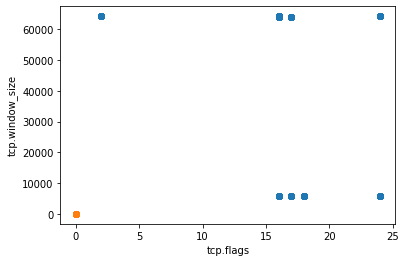

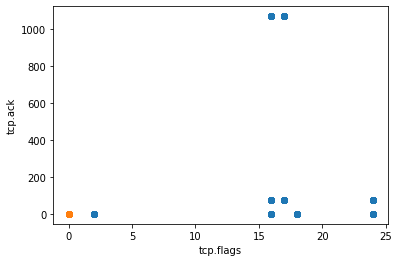

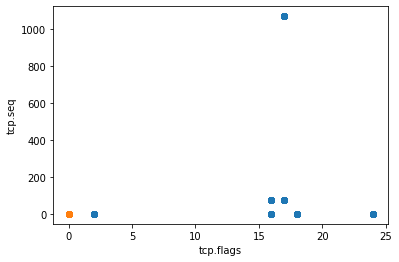

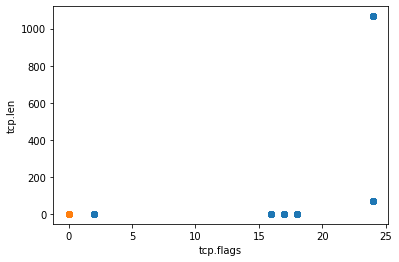

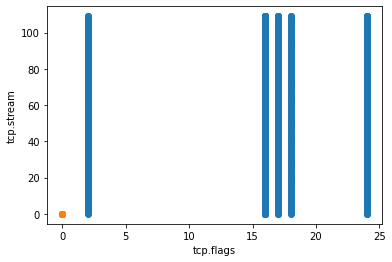

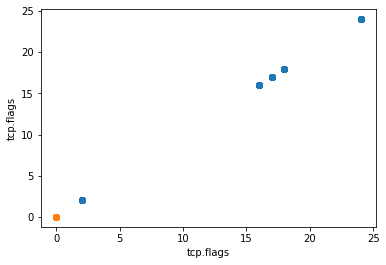

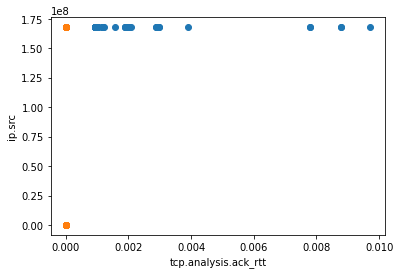

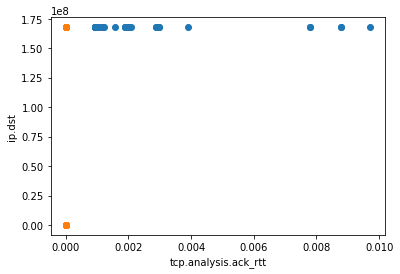

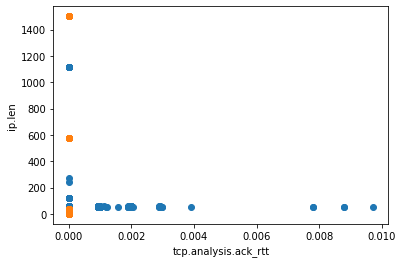

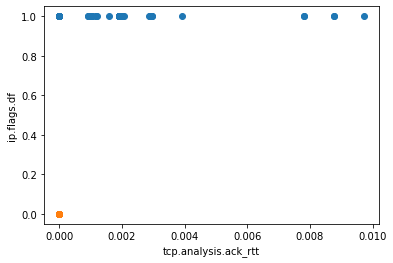

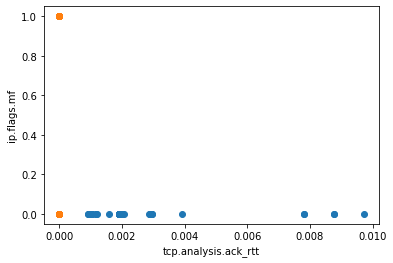

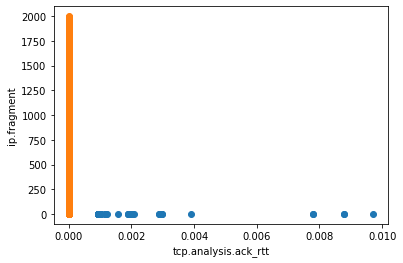

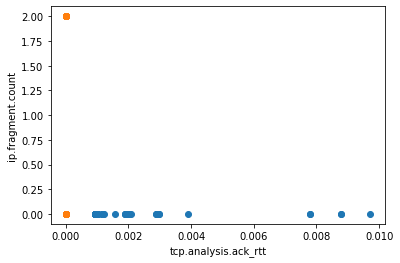

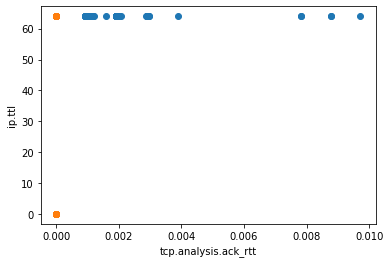

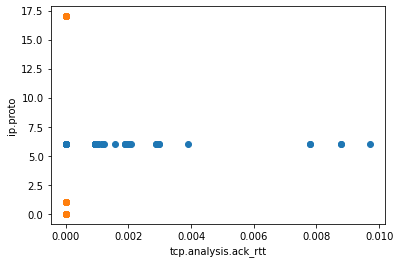

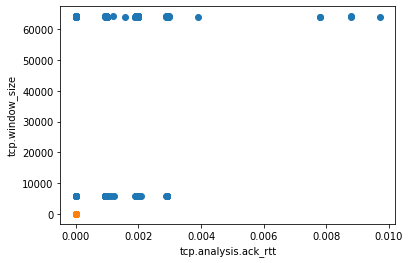

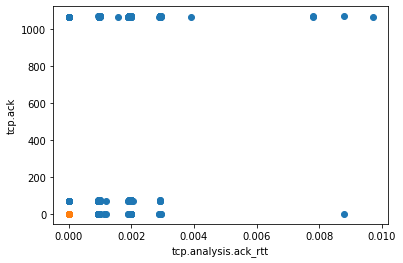

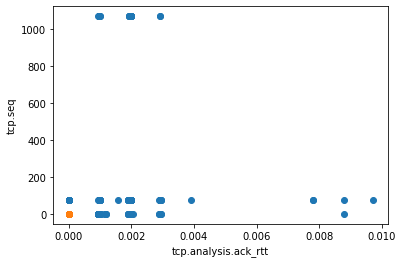

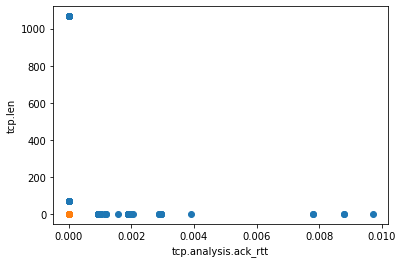

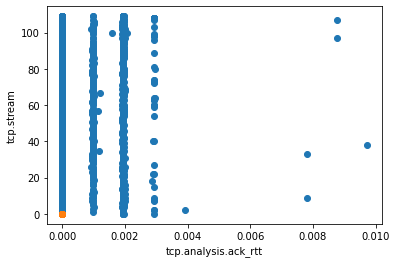

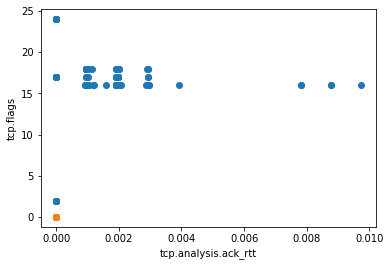

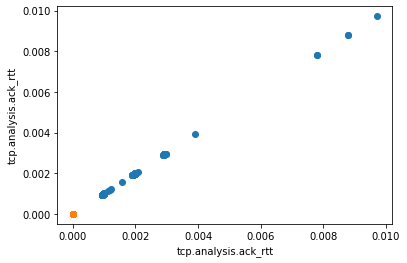

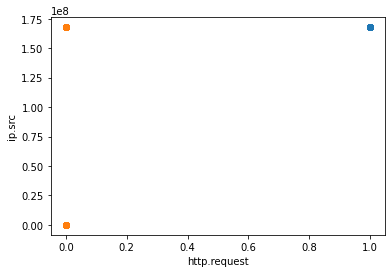

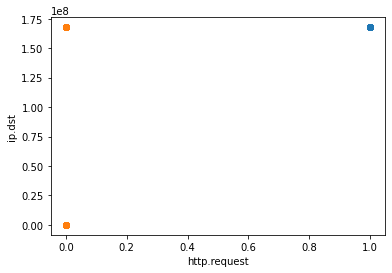

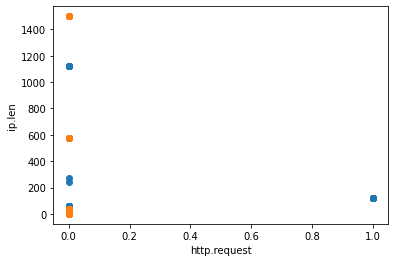

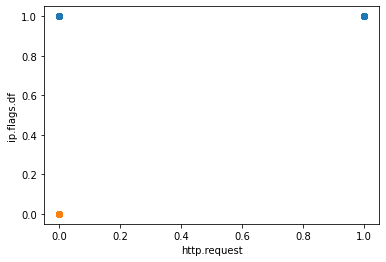

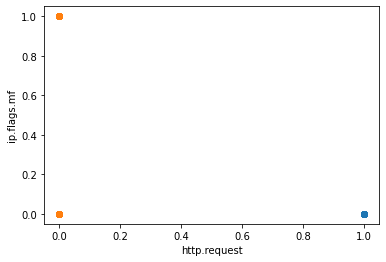

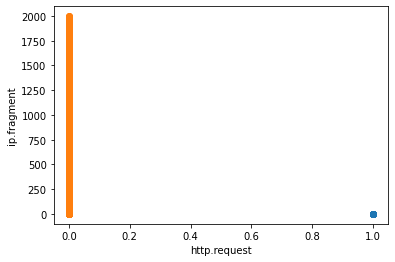

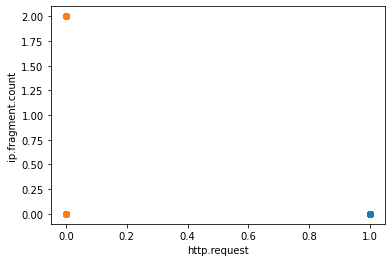

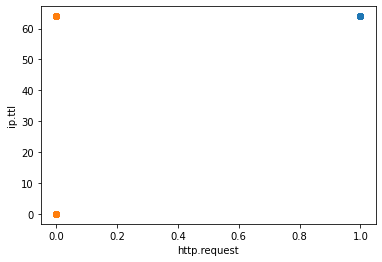

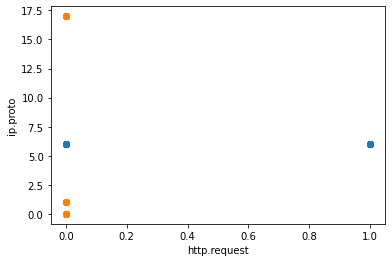

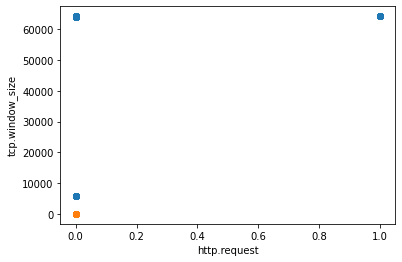

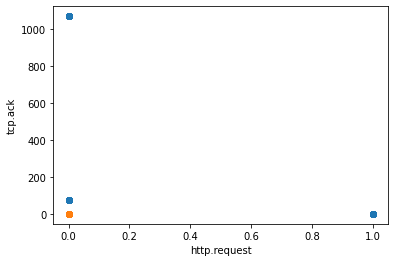

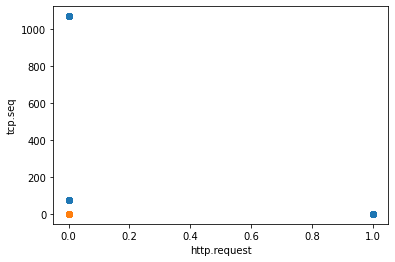

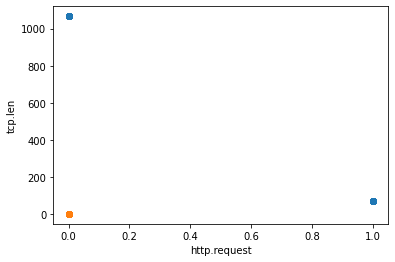

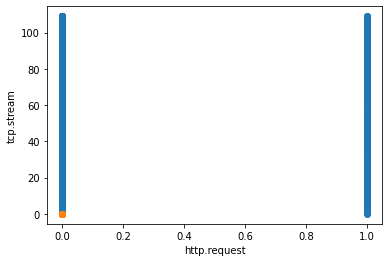

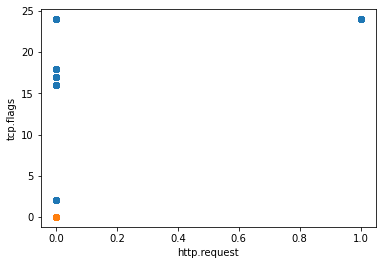

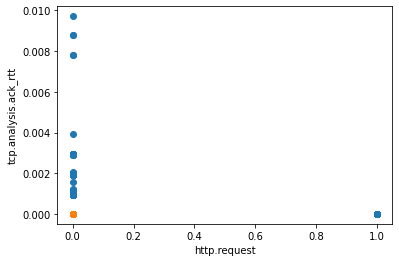

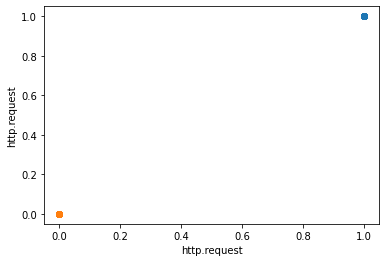

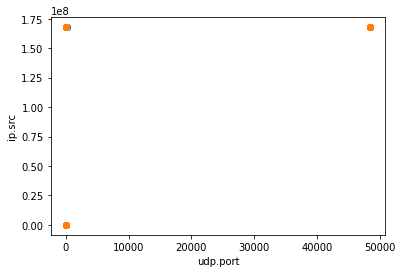

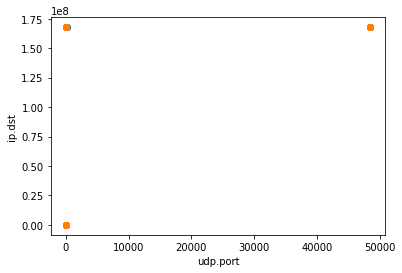

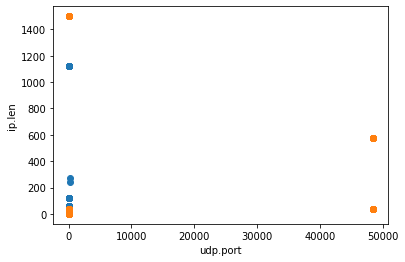

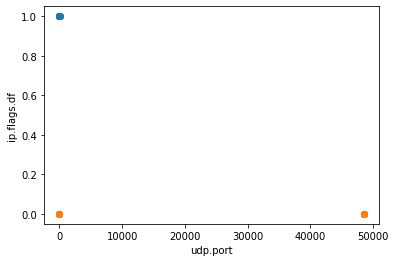

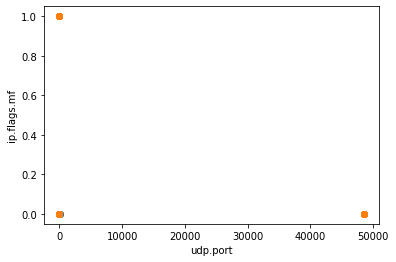

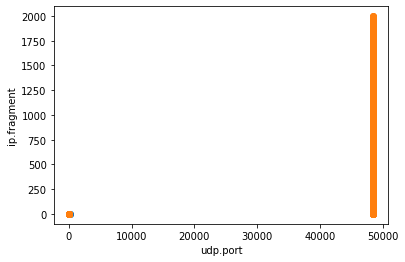

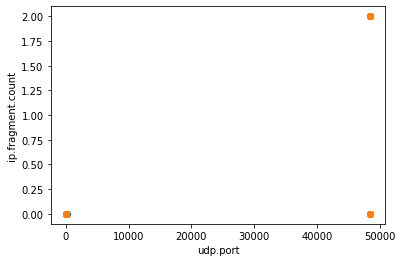

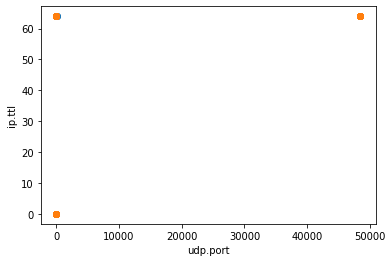

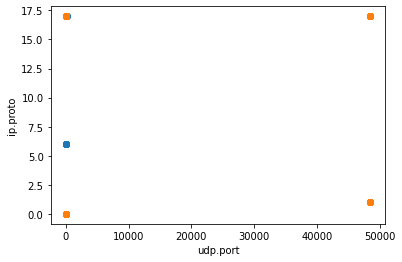

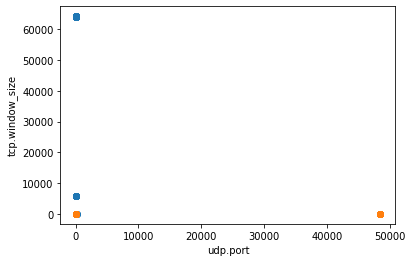

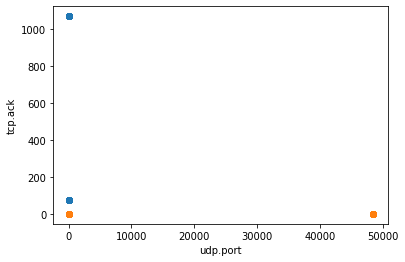

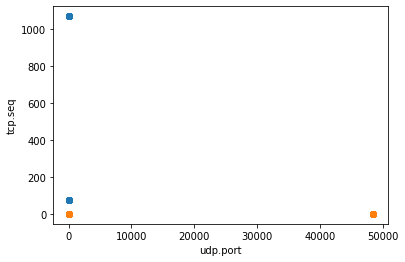

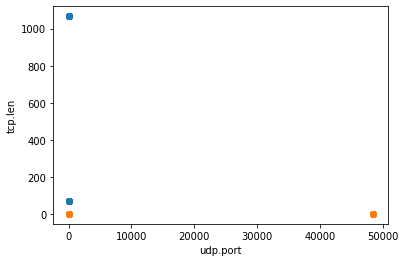

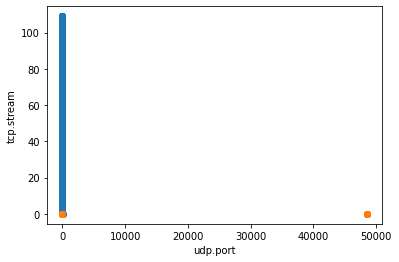

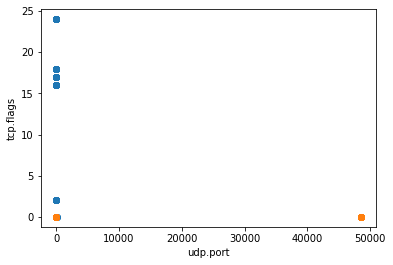

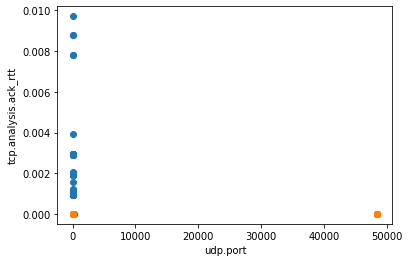

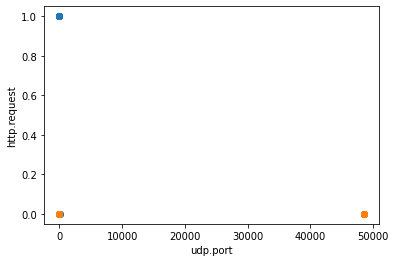

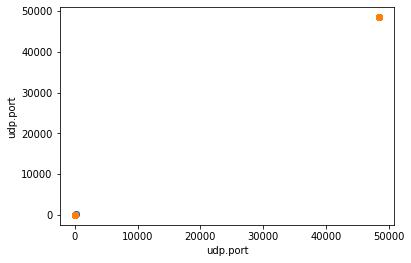

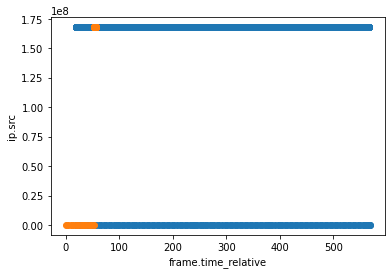

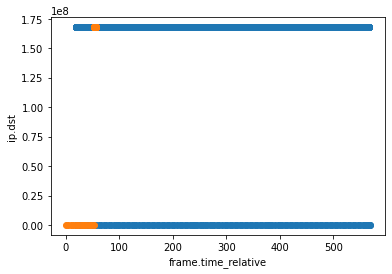

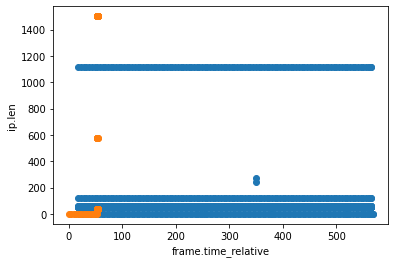

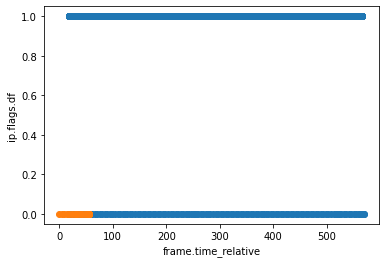

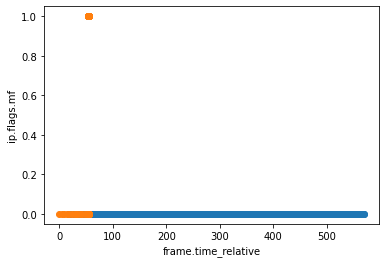

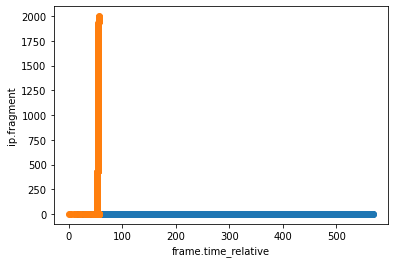

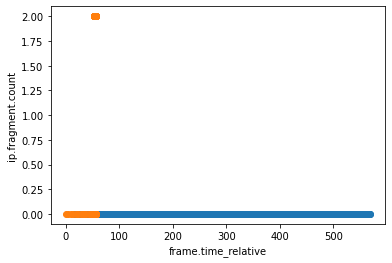

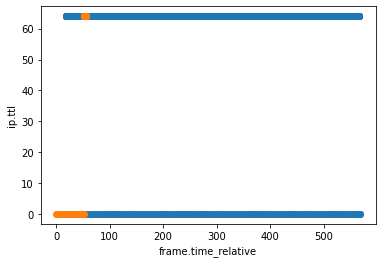

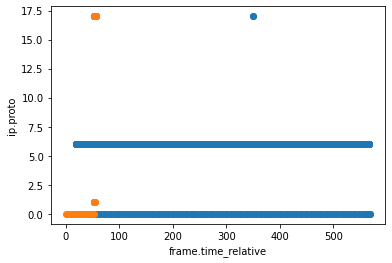

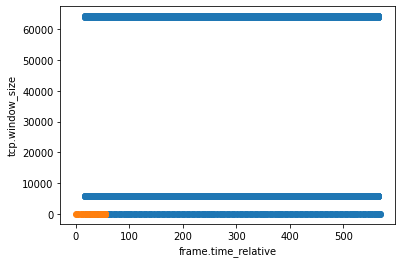

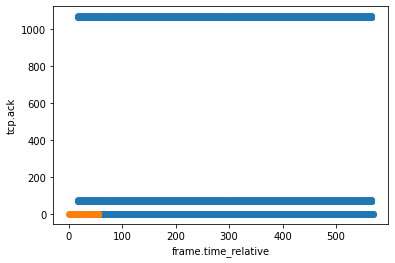

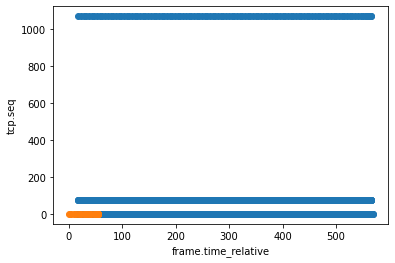

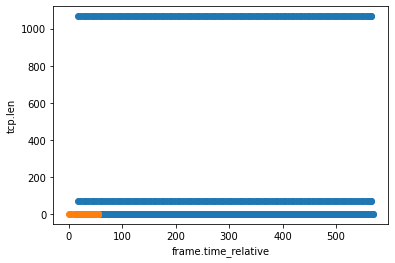

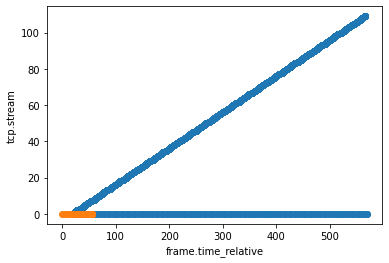

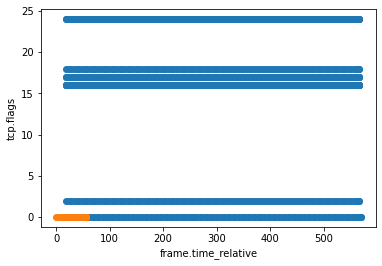

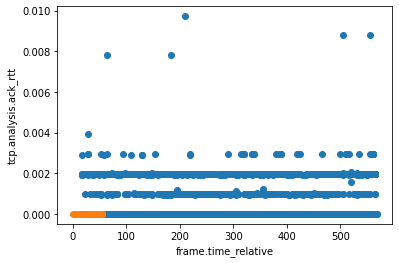

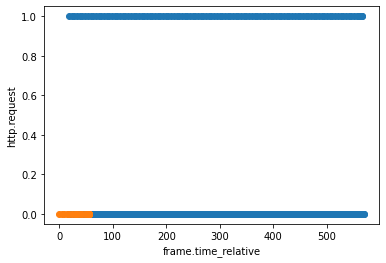

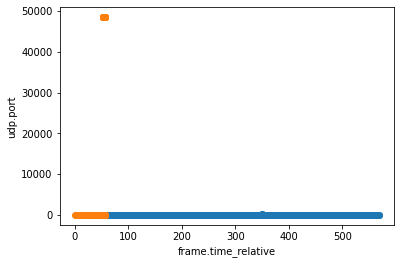

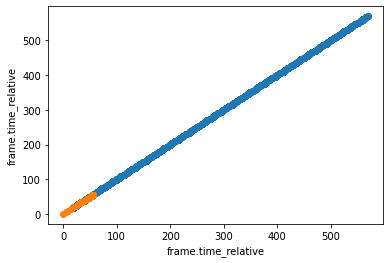

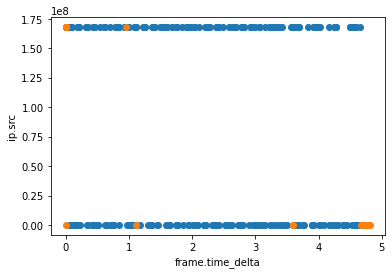

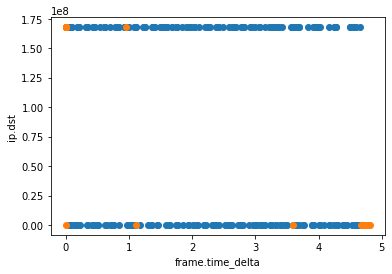

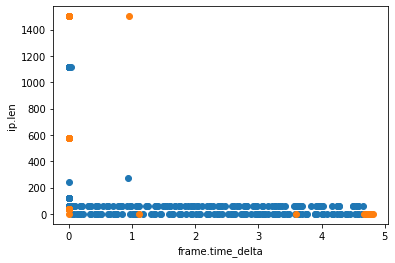

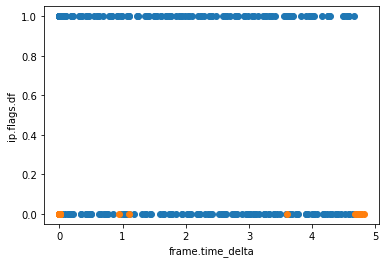

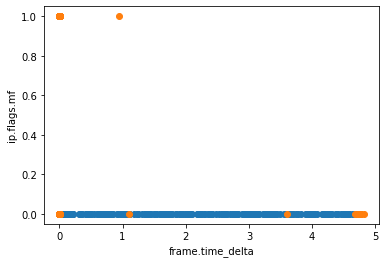

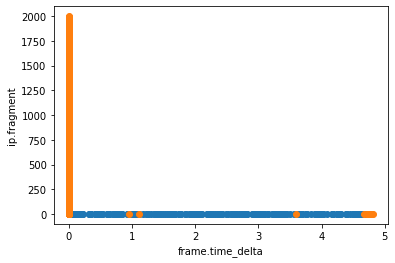

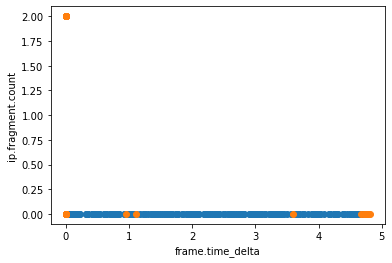

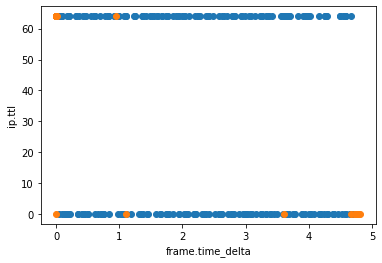

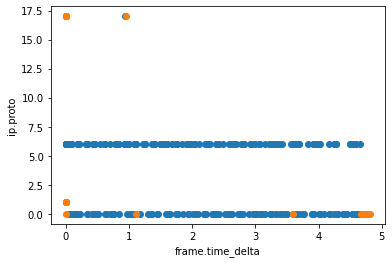

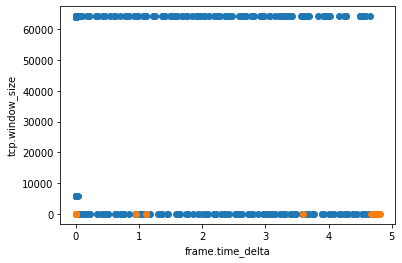

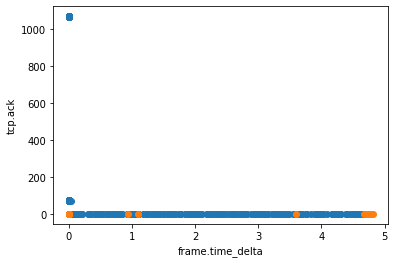

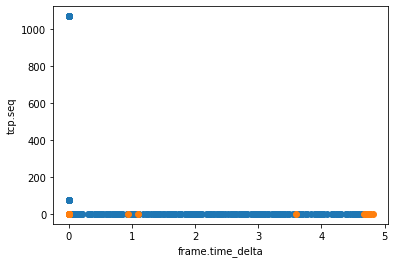

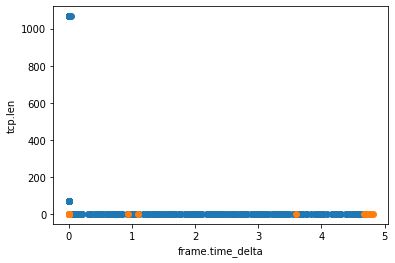

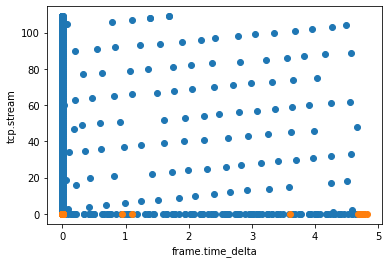

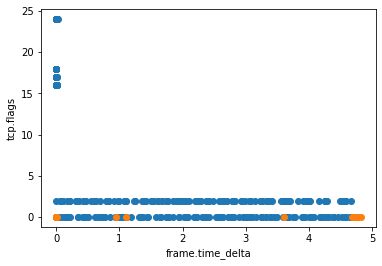

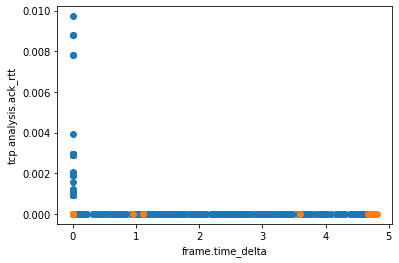

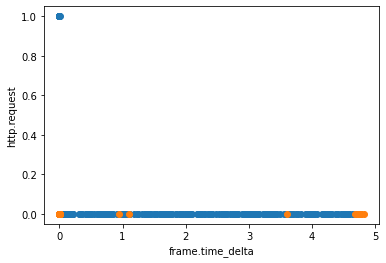

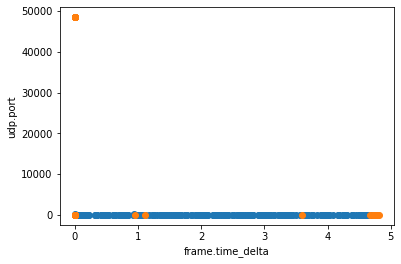

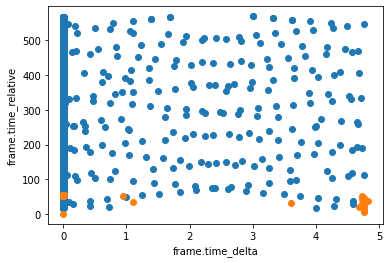

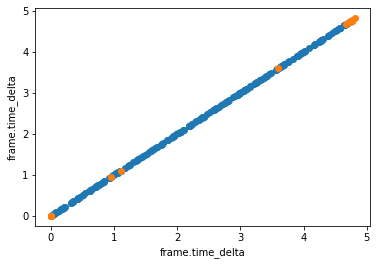

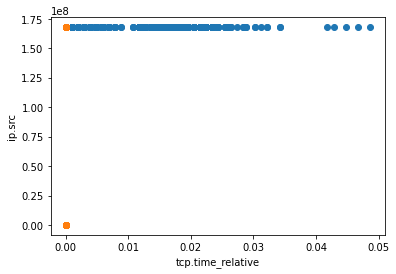

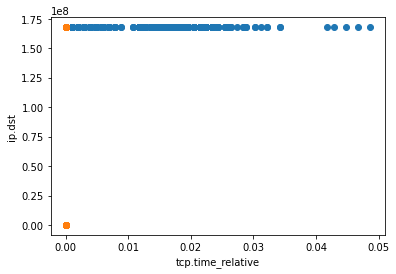

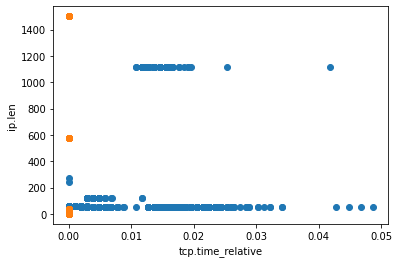

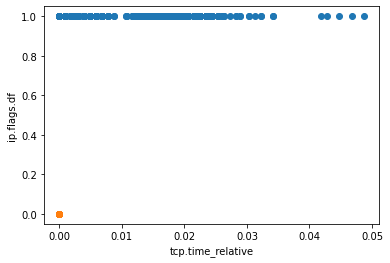

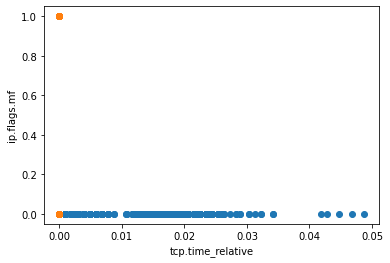

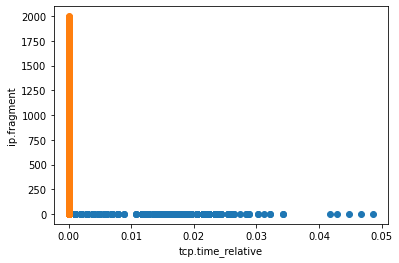

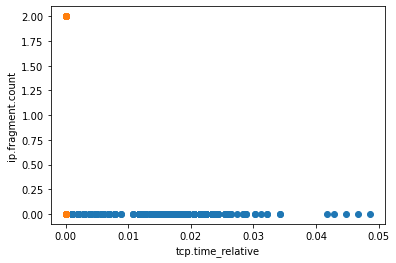

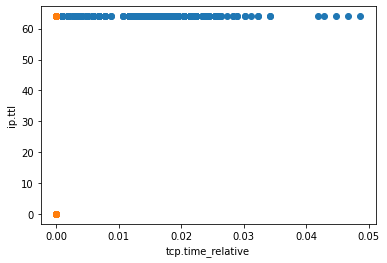

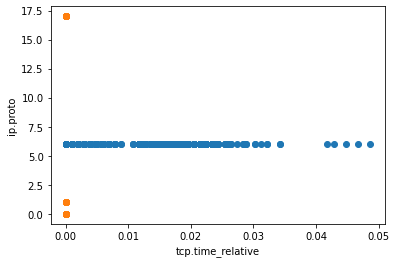

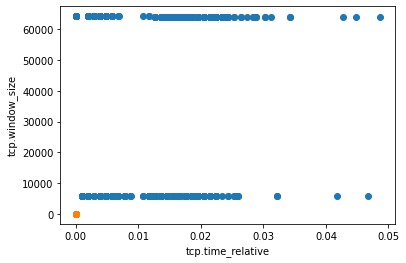

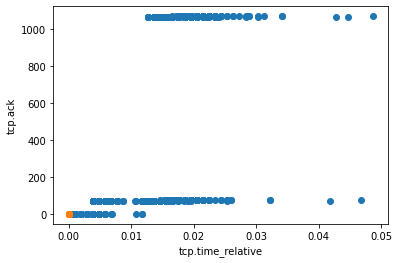

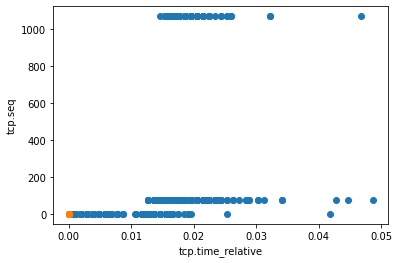

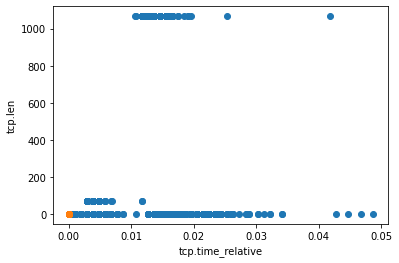

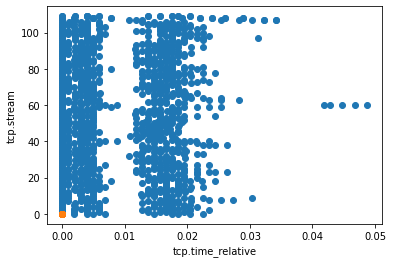

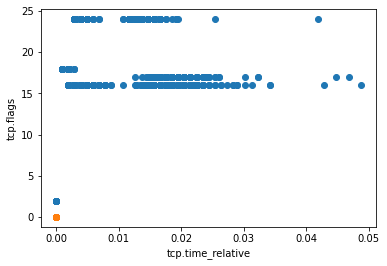

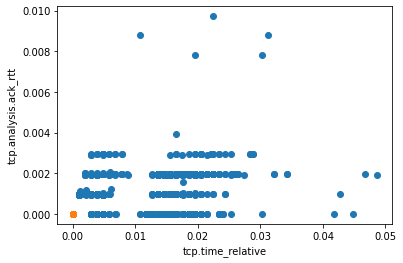

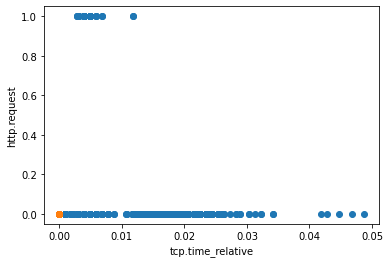

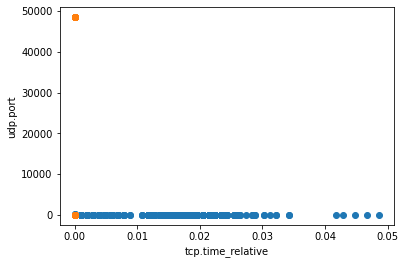

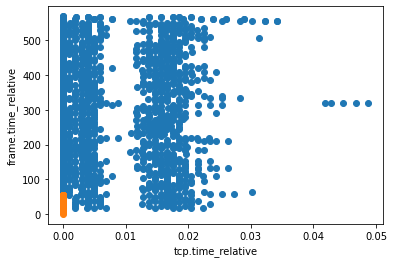

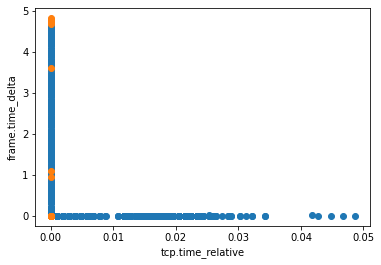

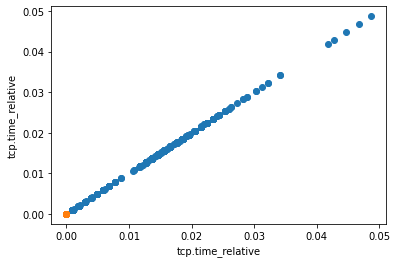

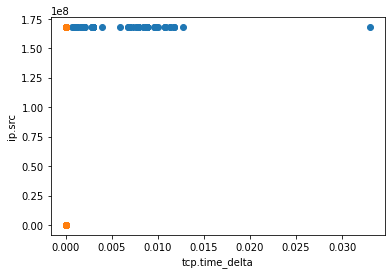

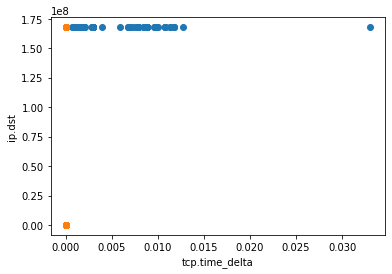

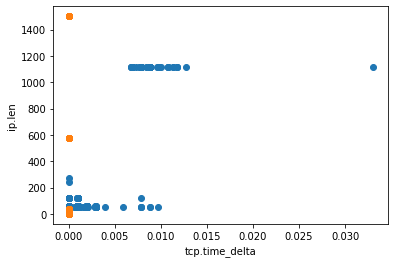

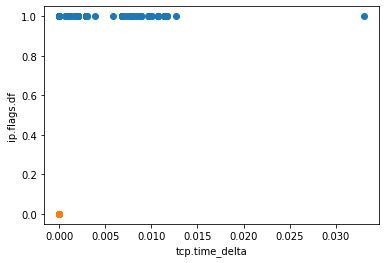

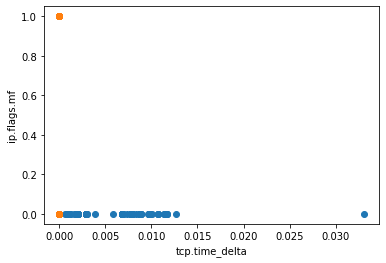

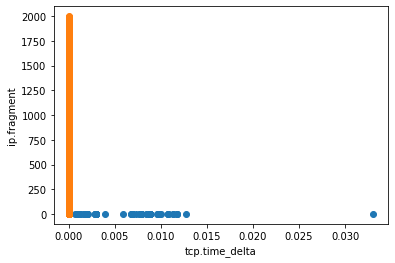

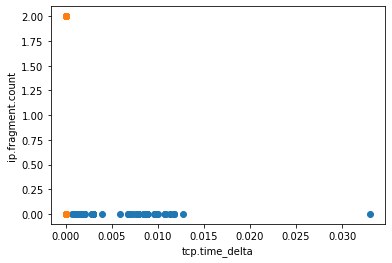

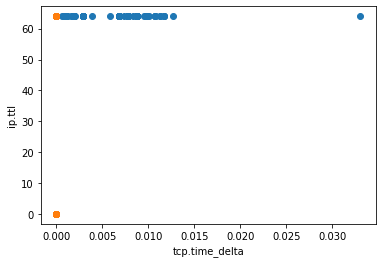

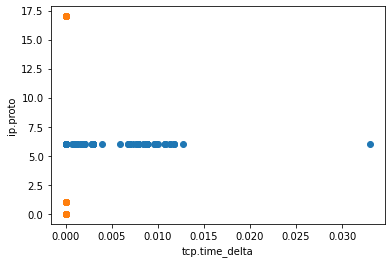

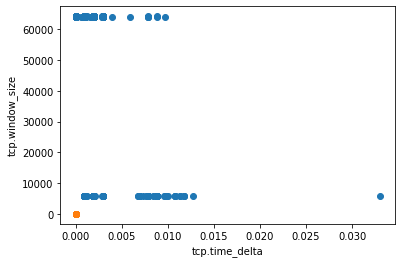

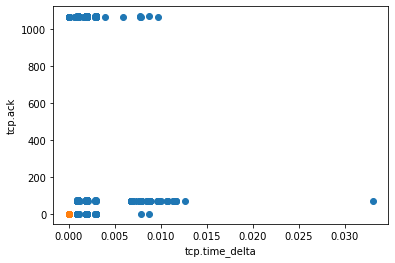

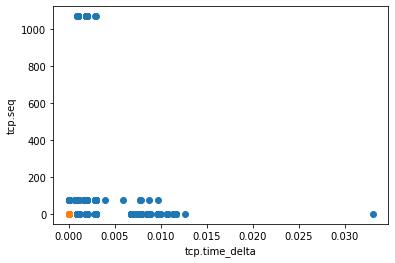

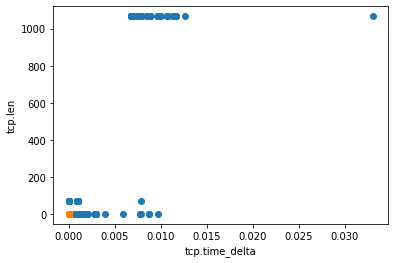

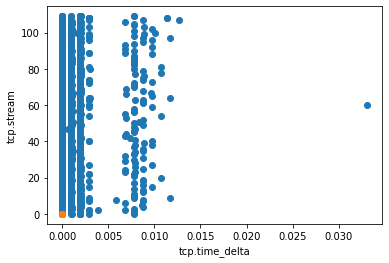

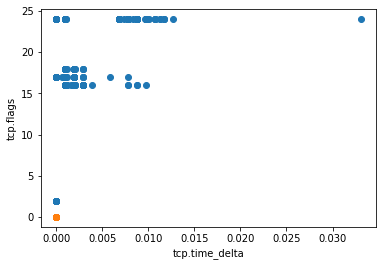

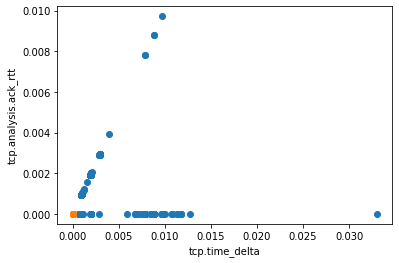

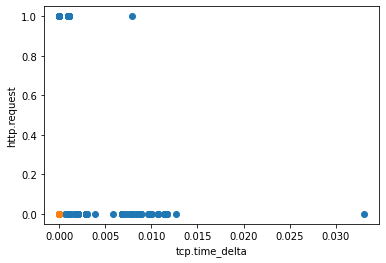

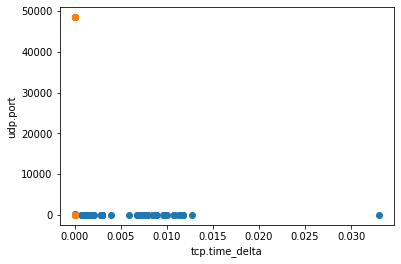

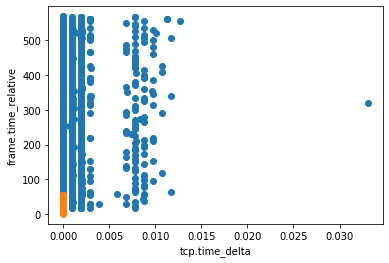

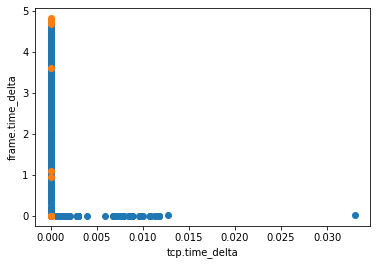

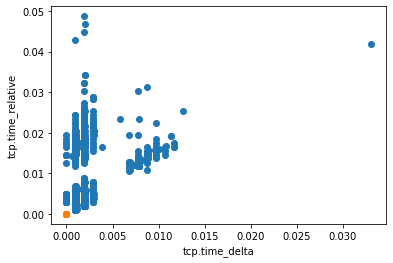

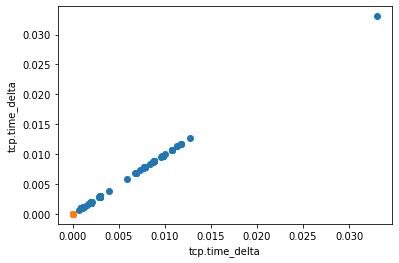

In [ ]:
safe = np.array(data['label'] == 'benign')
# attc = data['label'] == 'ddos'
attc = np.invert(safe)
n_f = len(data.iloc[0])
for i in range(n_f-1):
  for j in range(i+1):
    plt.scatter(data.iloc[safe,i],data.iloc[safe,j])
    plt.scatter(data.iloc[attc,i],data.iloc[attc,j])
    plt.xlabel(data.columns[i])
    plt.ylabel(data.columns[j])
    plt.show()

scatter matrixs in one look

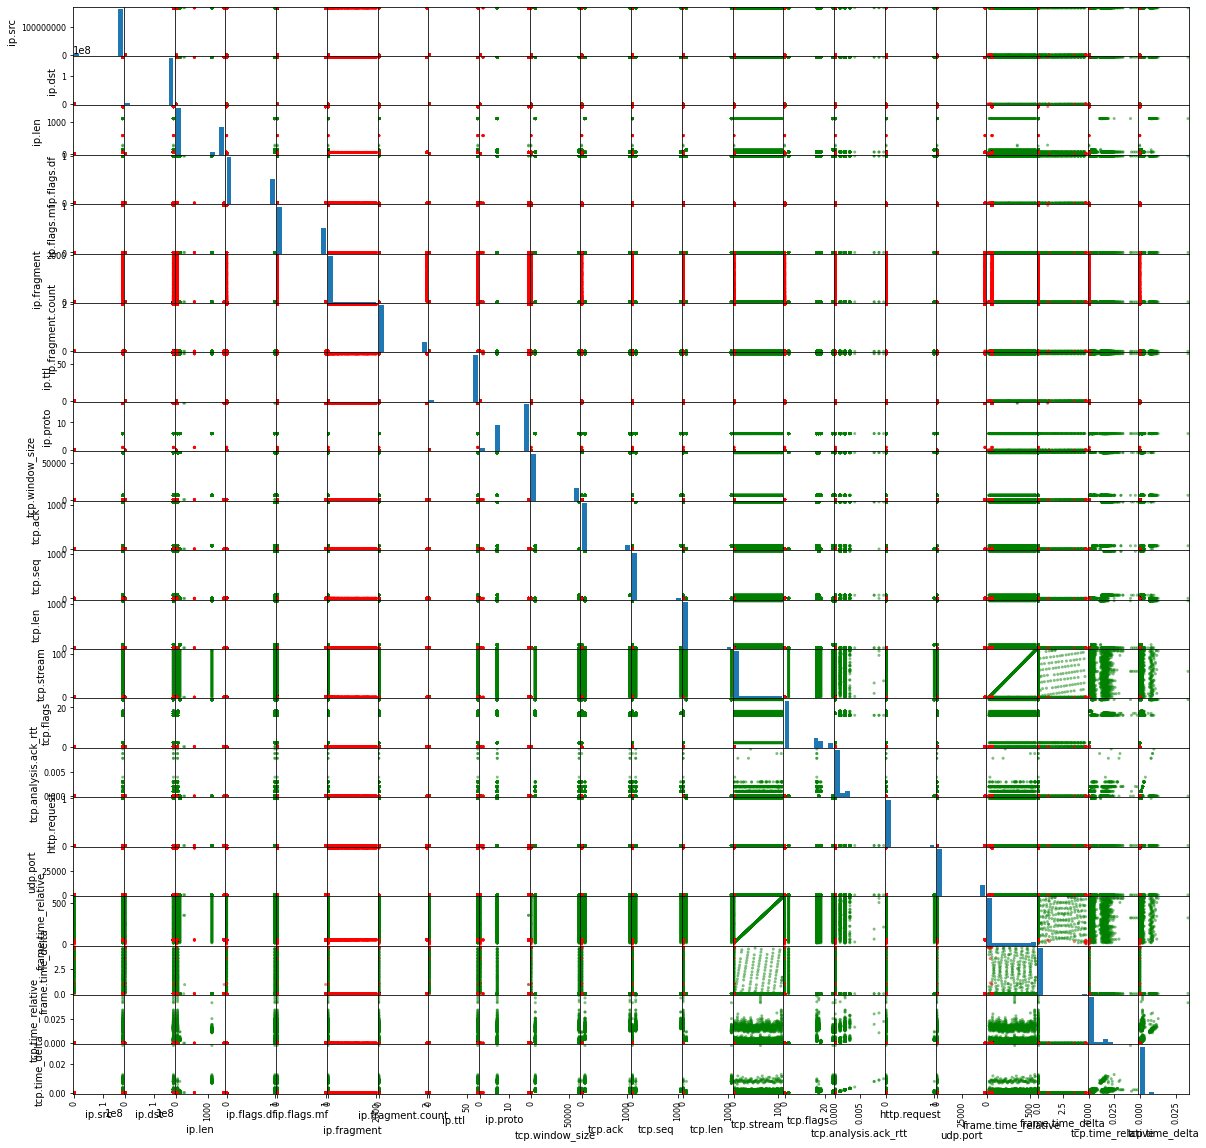

In [ ]:
C =  ['r' if x=='ddos' else 'g' for x in data.label]
pd.plotting.scatter_matrix(data, figsize=(20,20), c = C);

finding the correlation in features

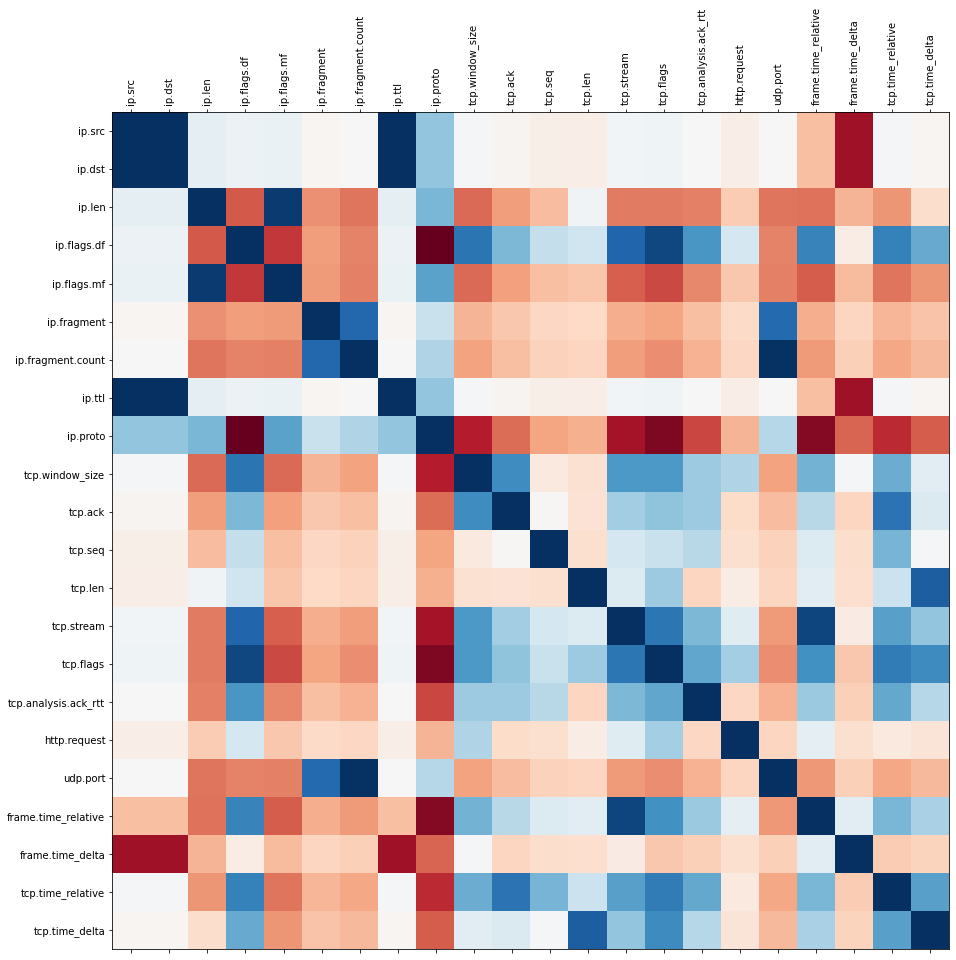

In [ ]:
corr = data.corr()
fig = plt.figure(figsize=(15,15))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)),corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

finding the important feature using mutual information

In [ ]:
I = np.zeros(n_f-1)
for i in range(n_f-1):
  minn,maxx = data.iloc[:,i].min(),data.iloc[:,i].max()
  Sa,Sax = np.histogram(np.array(data.iloc[safe,i]),range=(minn,maxx),bins=20)
  At,Atx = np.histogram(np.array(data.iloc[attc,i]),range=(minn,maxx),bins=20)
  c = (Sa+At)
  c_s = c.sum()
  nz = Sa!=0
  if nz.any():
    I[i] = (Sa[nz]/c_s*np.log2((Sa[nz]/c_s)/(Sa.sum()/c_s)/(c[nz]/c_s))).sum()
  nz = At!=0
  if nz.any():
    I[i] += (At[nz]/c_s*np.log2((At[nz]/c_s)/(At.sum()/c_s)/(c[nz]/c_s))).sum()

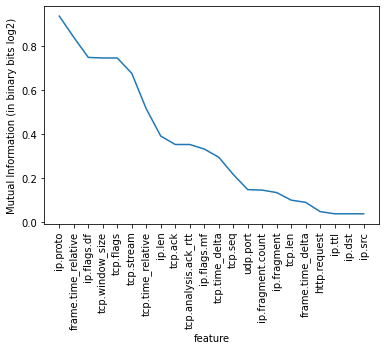

In [ ]:
plt.plot(np.flip(np.sort(I)))
plt.xlabel('feature')
plt.xticks(range(n_f-1),data.columns[np.flip(np.argsort(I))],rotation='vertical')
plt.ylabel('Mutual Information (in binary bits log2)')
plt.show()

In [ ]:
COLUMN = []
print("\n LIST OF THE BEST FEATURES \n")
print ("{:<25} {:<15} ".format('feature','Mutual Information (in binary bits log2)'))
for i in np.flip(np.argsort(I)):
    COLUMN.append(data.columns[i])
    print("{:<25} {:<15}".format(data.columns[i],np.round(I[i],3)))


 LIST OF THE BEST FEATURES 

feature                   Mutual Information (in binary bits log2) 
ip.proto                  0.935          
frame.time_relative       0.839          
ip.flags.df               0.748          
tcp.window_size           0.745          
tcp.flags                 0.745          
tcp.stream                0.676          
tcp.time_relative         0.515          
ip.len                    0.391          
tcp.ack                   0.353          
tcp.analysis.ack_rtt      0.353          
ip.flags.mf               0.333          
tcp.time_delta            0.296          
tcp.seq                   0.217          
udp.port                  0.149          
ip.fragment.count         0.146          
ip.fragment               0.135          
tcp.len                   0.101          
frame.time_delta          0.091          
http.request              0.049          
ip.ttl                    0.039          
ip.dst                    0.039          
ip.src              

# purturbing step 3

these are the features that we want to purturb 

In [13]:
prtub_features = ['ip.flags.df','ip.flags.mf','ip.len','ip.ttl','frame.time_delta','tcp.flags','label']
prtub_features

['ip.flags.df',
 'ip.flags.mf',
 'ip.len',
 'ip.ttl',
 'frame.time_delta',
 'tcp.flags',
 'label']

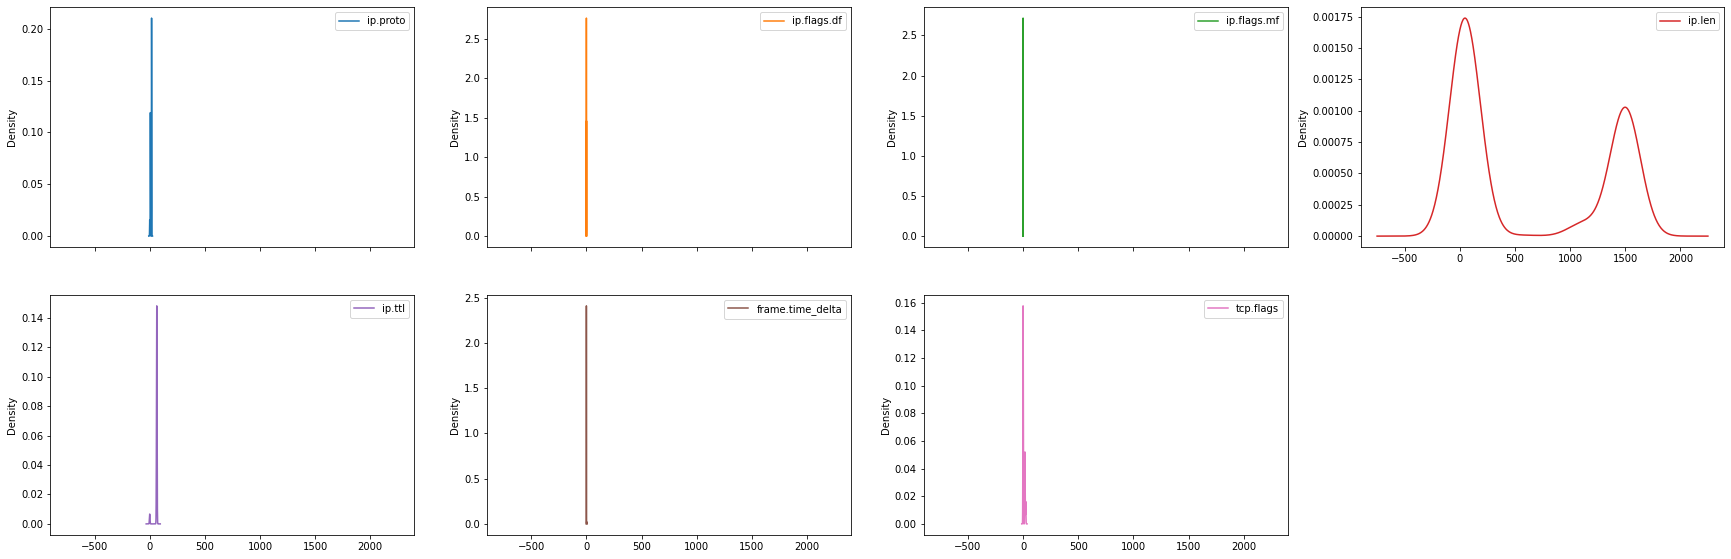

In [ ]:
boxx = prtub_features
data[boxx].plot(kind = 'density', subplots = True, layout = (3,4), figsize = (30,15));

histogram for benign data set

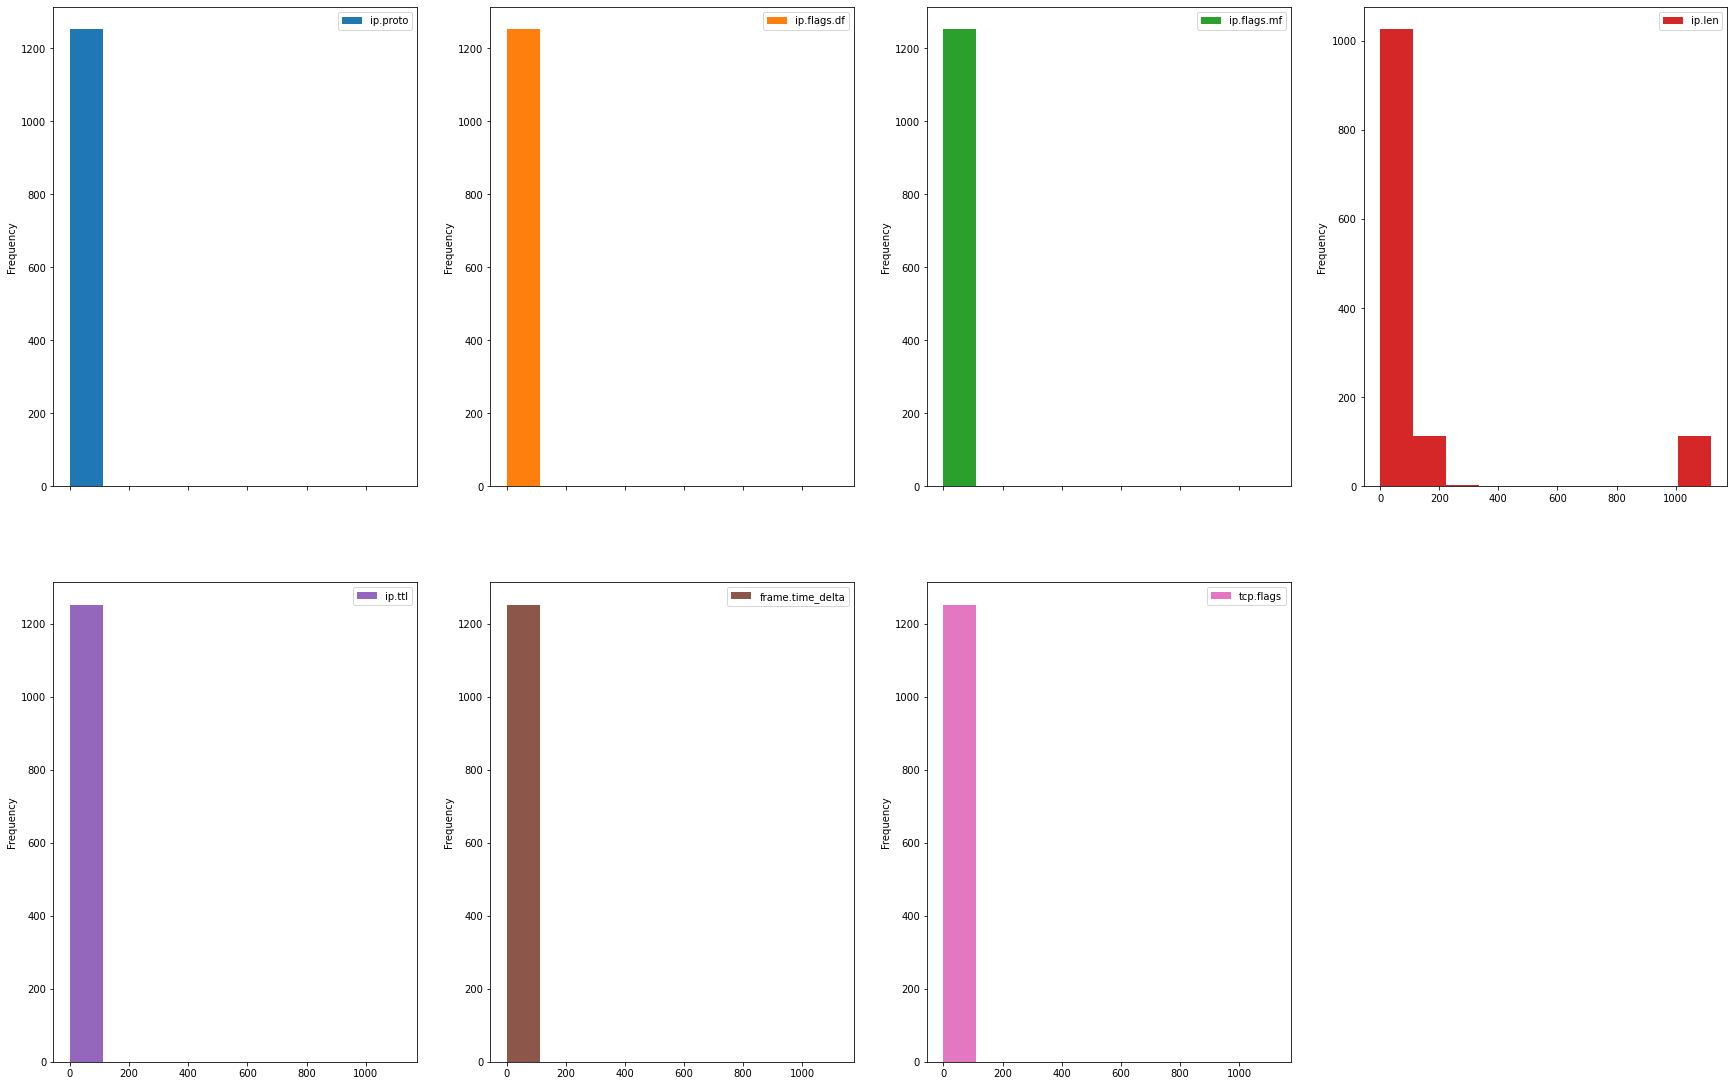

In [ ]:
boxx = prtub_features
data1[boxx].plot(kind = 'hist', subplots = True, layout = (3,4), figsize = (30,30));

histogram for malicious data set

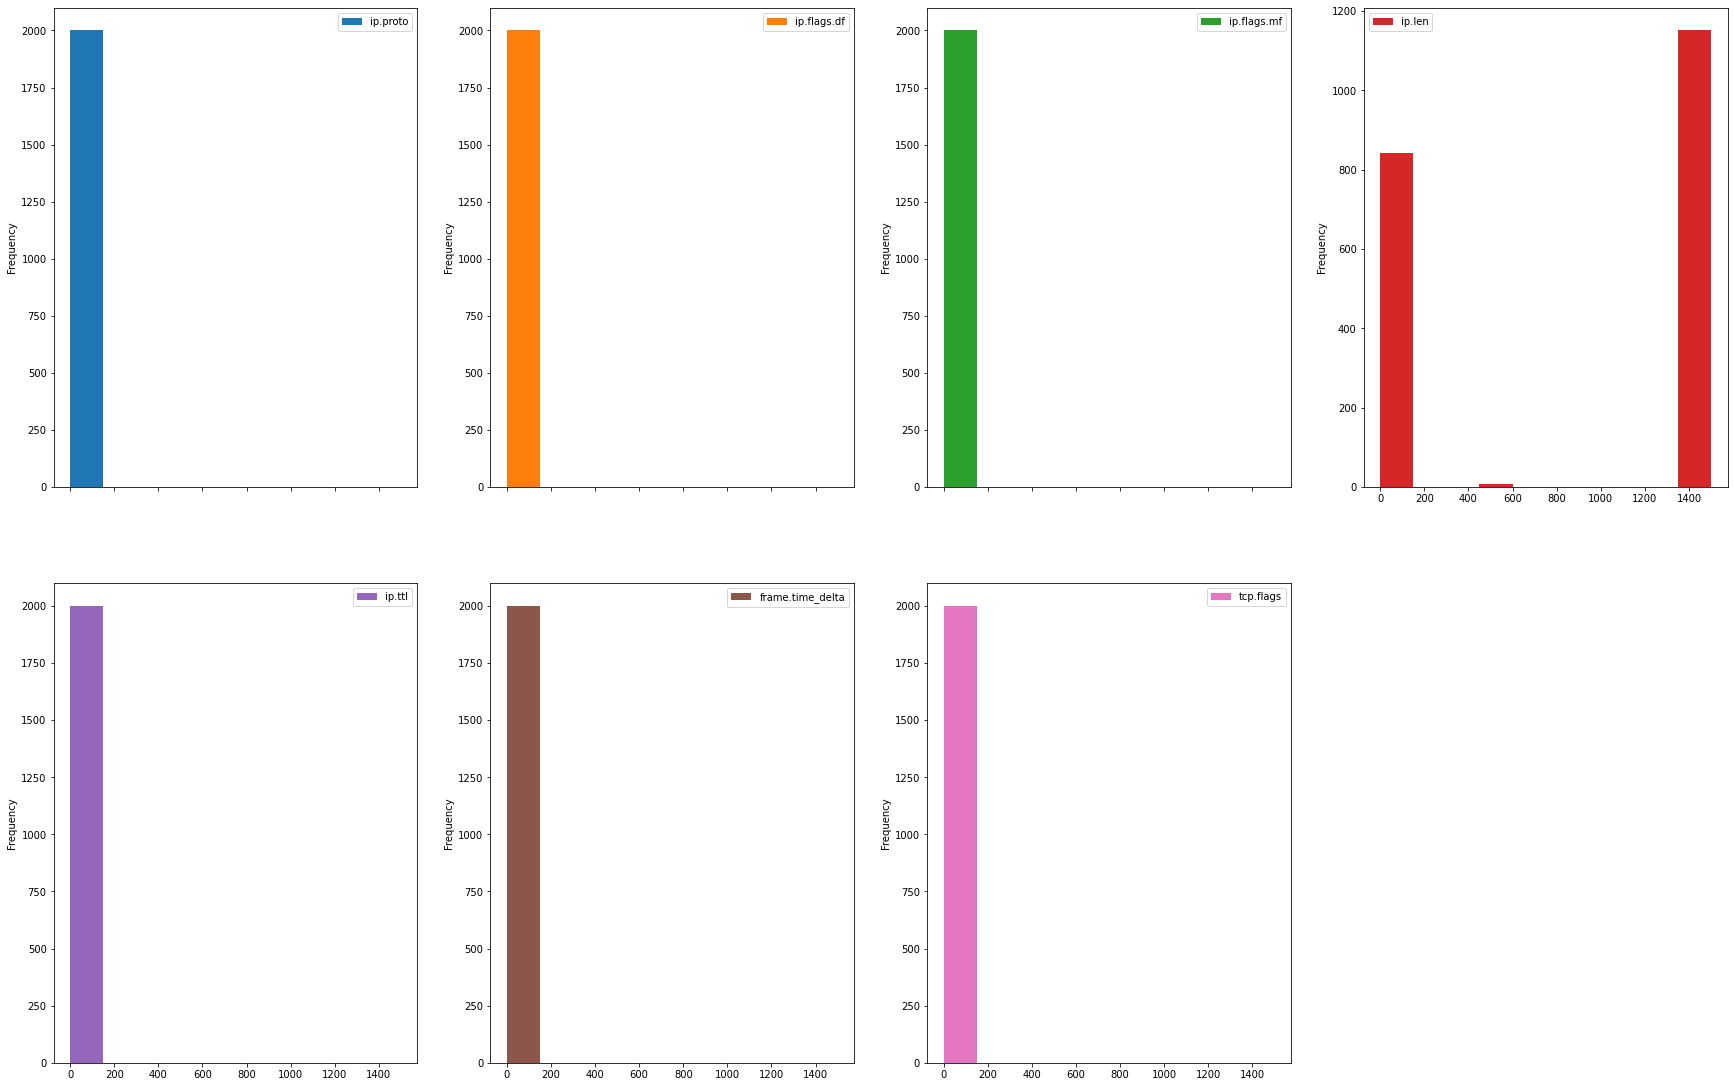

In [ ]:
boxx = prtub_features
data2[boxx].plot(kind = 'hist', subplots = True, layout = (3,4), figsize = (30,30));

histogram for all data set

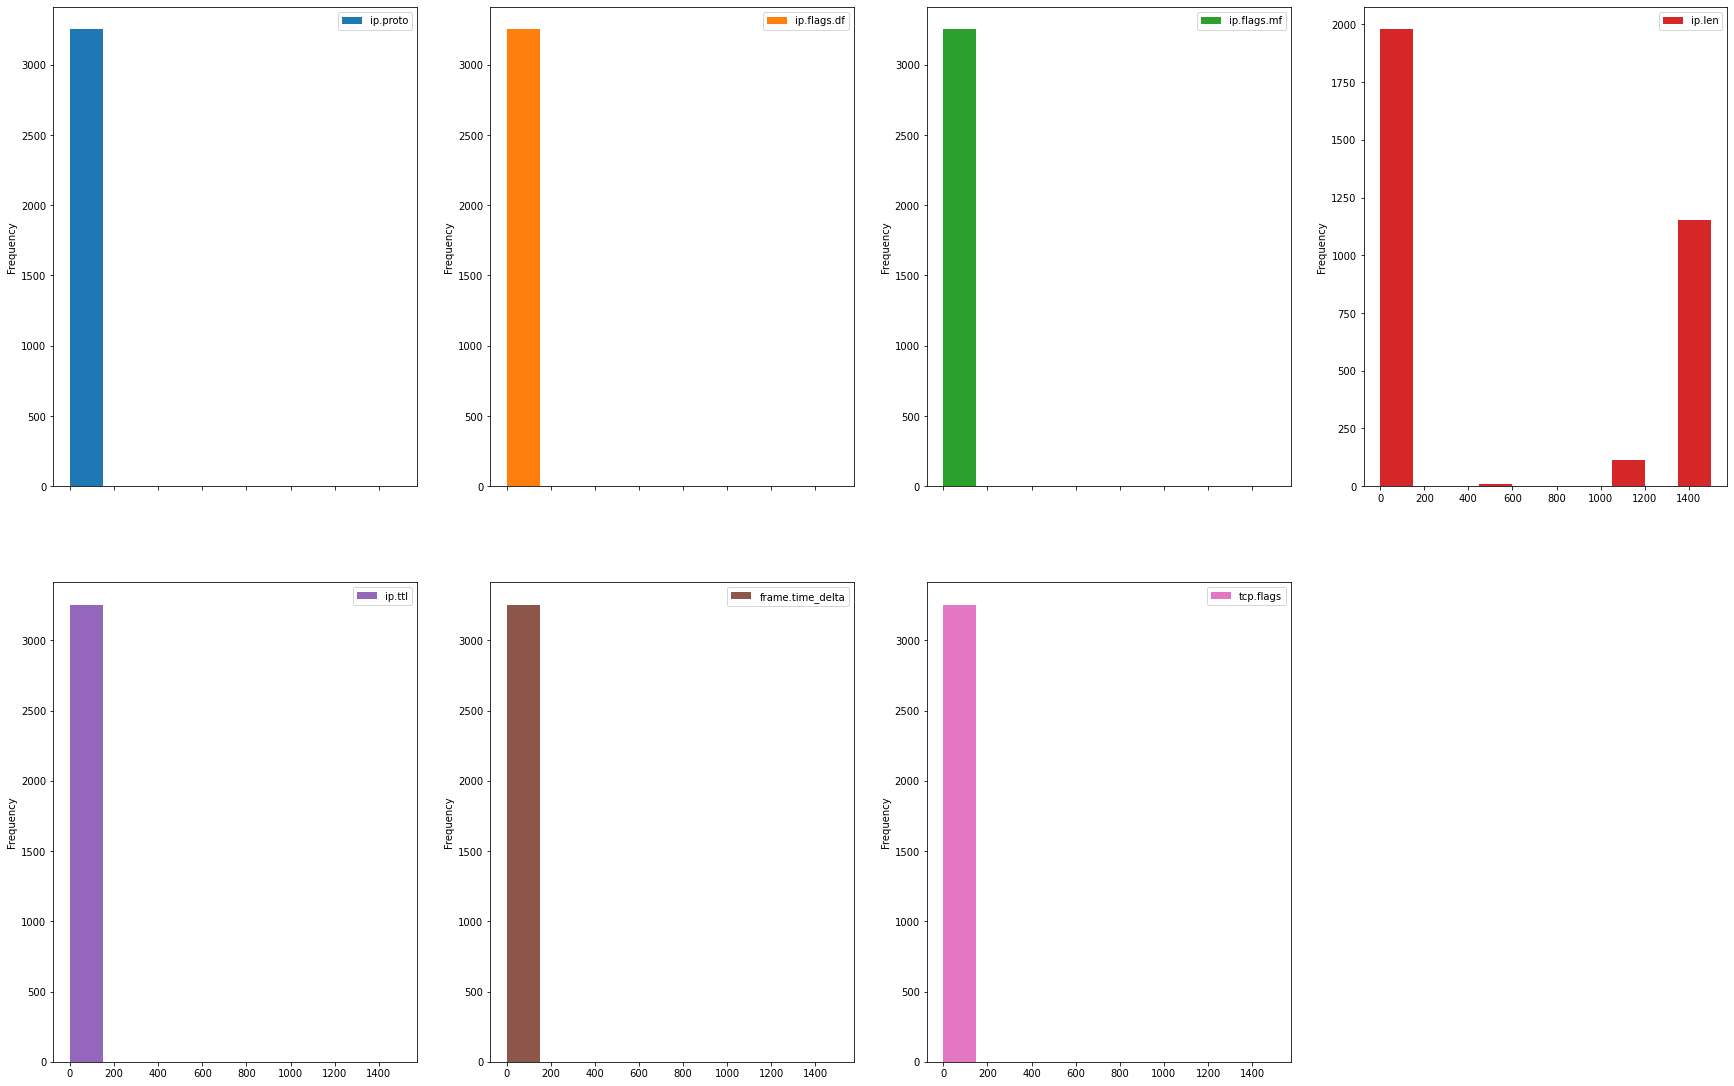

In [ ]:
boxx = prtub_features
data[boxx].plot(kind = 'hist', subplots = True, layout = (3,4), figsize = (30,30));

test on porturbed data

In [14]:
%%time

avg_num = 5 #we do this code avg_num times and then get an average

duration_fit_list=[]
duration_pred_list=[]
accuracy_score_list=[]
weighted_precision_score_list=[]
weighted_recall_score_list=[]
weighted_f1_score_list=[]
# data_clean = data
for model in model_list:
  clf = model
  print(f"this model: {model}")
  duration_fit=0
  duration_pred=0
  accuracy_scores = 0
  weighted_precision_scores = 0
  weighted_recall_scores = 0
  weighted_f1_scores = 0

  for n in range(avg_num):
    sample_data = data_clean.sample(2000)
    X = sample_data.drop('label', axis = 1)
    Y = sample_data['label']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    # %time
    start_fit = time()
    clf.fit(X_train,Y_train)
    end_fit = time()
    duration_fit += end_fit - start_fit 
    v = len(prtub_features)
    datasamp = data1.sample(500)
    for i in prtub_features[0:v-1]:
        f = datasamp[f'{i}']
        f  = np.array(f)
        X_test[f'{i}'] = f
    start_pred = time()
    Y_pred = clf.predict(X_test)
    end_pred = time()
    duration_pred += end_pred - start_pred

    accuracy_scores += round(accuracy_score(Y_test, Y_pred),4)
    weighted_precision_scores += round(precision_score(Y_test, Y_pred, average='weighted',zero_division=1), 4)
    weighted_recall_scores += round(recall_score(Y_test, Y_pred, average='weighted'), 4)
    weighted_f1_scores += round(f1_score(Y_test, Y_pred, average='weighted'), 4)
    
  duration_fit_list.append(duration_fit/avg_num)
  duration_pred_list.append(duration_pred/avg_num)
  accuracy_score_list.append(accuracy_scores/avg_num)
  weighted_precision_score_list.append(weighted_precision_scores/avg_num)
  weighted_recall_score_list.append(weighted_recall_scores/avg_num)
  weighted_f1_score_list.append(weighted_f1_scores/avg_num)


duration_fit=0
duration_pred=0
accuracy_scores = 0
weighted_precision_scores = 0
weighted_recall_scores = 0
weighted_f1_scores = 0

for n in range(avg_num):
  sample_data = data_clean.sample(2000)
  X = sample_data.drop('label', axis = 1)
  Y = sample_data['label']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
  y_tes = np.array(Y_test=='ddos').astype(int)
  y_tra = np.array(Y_train=='ddos').astype(int)
  # %time
  start_fit = time()
  NN.fit(X_train,y_tra,epochs=30)
  end_fit = time()
  duration_fit += end_fit - start_fit 
  v = len(prtub_features)
  datasamp = data1.sample(500)
  for i in prtub_features[0:v-1]:
      f = datasamp[f'{i}']
      f  = np.array(f)
      X_test[f'{i}'] = f
  start_pred = time()
  Y_pred = np.argsort(NN.predict(X_test))[:,1]
  end_pred = time()
  duration_pred += end_pred - start_pred

  accuracy_scores += round(accuracy_score(y_tes, Y_pred),4)
  weighted_precision_scores += round(precision_score(y_tes, Y_pred, average='weighted',zero_division=1), 4)
  weighted_recall_scores += round(recall_score(y_tes, Y_pred, average='weighted'), 4)
  weighted_f1_scores += round(f1_score(y_tes, Y_pred, average='weighted'), 4)
  
duration_fit_list.append(duration_fit/avg_num)
duration_pred_list.append(duration_pred/avg_num)
accuracy_score_list.append(accuracy_scores/avg_num)
weighted_precision_score_list.append(weighted_precision_scores/avg_num)
weighted_recall_score_list.append(weighted_recall_scores/avg_num)
weighted_f1_score_list.append(weighted_f1_scores/avg_num)


model_list_name = list(str(i) for i in model_list) # a list for the names of models
model_list_name.append("Sequential Neural Network(10,8,5)")
report_dataprt = pd.DataFrame(model_list_name, columns=['model'])
report_dataprt['fit_duration'] = duration_fit_list
report_dataprt['pred_duration'] = duration_pred_list
report_dataprt['accuracy'] = accuracy_score_list
report_dataprt['weighted_precision'] = weighted_precision_score_list
report_dataprt['weighted_recall'] = weighted_recall_score_list
report_dataprt['weighted_f1_score'] = weighted_f1_score_list

report_dataprt


this model: DecisionTreeClassifier()
this model: RandomForestClassifier()
this model: KNeighborsClassifier()
this model: OneVsRestClassifier(estimator=SVC())
this model: DummyClassifier(strategy='most_frequent')
this model: SVC()
this model: GaussianNB()
Epoch 1/30
47/47 [==============================] - 0s 1ms/step - loss: 5383.4365 - accuracy: 0.8167
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 4802.6685 - accuracy: 0.8000
Epoch 3/30
47/47 [==============================] - 0s 1ms/step - loss: 10451.4150 - accuracy: 0.7447
Epoch 4/30
47/47 [==============================] - 0s 1ms/step - loss: 6669.9614 - accuracy: 0.8033
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 4800.3828 - accuracy: 0.8007
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 8723.5098 - accuracy: 0.7953
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 3767.7703 - accuracy: 0.8147
Epoch 8/30
47/47 [===================

In [15]:
report_dataprt

,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,DecisionTreeClassifier(),0.004749,0.002142,0.7788,0.90518,0.7788,0.73480
1,RandomForestClassifier(),0.169451,0.015324,0.8624,0.93264,0.8624,0.84190
2,KNeighborsClassifier(),0.004286,0.041287,0.9956,0.99564,0.9956,0.99560
3,OneVsRestClassifier(estimator=SVC()),0.114532,0.046142,0.6524,0.75494,0.6524,0.55086
4,DummyClassifier(strategy='most_frequent'),0.000705,0.000080,0.6152,0.76350,0.6152,0.46876
5,SVC(),0.102349,0.044142,0.6496,0.72812,0.6496,0.54968
6,GaussianNB(),0.004588,0.002209,0.9956,0.99564,0.9956,0.99560
7,"Sequential Neural Network(10,8,5)",2.598716,0.095415,0.6856,0.76330,0.6856,0.60232


In [16]:
report_data

,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,DecisionTreeClassifier(),0.016134,0.004097,0.99680,0.99682,0.99680,0.99680
1,RandomForestClassifier(),0.492337,0.040801,0.99616,0.99620,0.99616,0.99616
2,KNeighborsClassifier(),0.009206,0.106346,0.99680,0.99682,0.99680,0.99680
3,OneVsRestClassifier(estimator=SVC()),0.324671,0.134663,0.65728,0.73378,0.65728,0.55420
4,DummyClassifier(strategy='most_frequent'),0.001352,0.000146,0.60768,0.76188,0.60768,0.45952
5,SVC(),0.316239,0.141063,0.64448,0.73826,0.64448,0.54064
6,GaussianNB(),0.007098,0.003030,0.99648,0.99652,0.99648,0.99648
7,"Sequential Neural Network(10,8,5)",7.254331,0.230737,0.65632,0.74728,0.65632,0.55614


# training eith perturbed data

In [17]:
%%time

avg_num = 5 #we do this code avg_num times and then get an average

duration_fit_list=[]
duration_pred_list=[]
accuracy_score_list=[]
weighted_precision_score_list=[]
weighted_recall_score_list=[]
weighted_f1_score_list=[]
# data_clean = data
for model in model_list:
  clf = model
  print(f"this model: {model}")
  duration_fit=0
  duration_pred=0
  accuracy_scores = 0
  weighted_precision_scores = 0
  weighted_recall_scores = 0
  weighted_f1_scores = 0

  for n in range(avg_num):
    sample_data = data_clean.sample(2000)
    X = sample_data.drop('label', axis = 1)
    Y = sample_data['label']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    v = len(prtub_features)
    datasamp = data1.sample(1500,replace=True)
    for i in prtub_features[0:v-1]:
        f = datasamp[f'{i}']
        f  = np.array(f)
        X_train[f'{i}'] = f
    # %time
    start_fit = time()
    clf.fit(X_train,Y_train)
    end_fit = time()
    duration_fit += end_fit - start_fit 
    # v = len(prtub_features)
    datasamp = data1.sample(500)
    for i in prtub_features[0:v-1]:
        f = datasamp[f'{i}']
        f  = np.array(f)
        X_test[f'{i}'] = f
    start_pred = time()
    Y_pred = clf.predict(X_test)
    end_pred = time()
    duration_pred += end_pred - start_pred

    accuracy_scores += round(accuracy_score(Y_test, Y_pred),4)
    weighted_precision_scores += round(precision_score(Y_test, Y_pred, average='weighted',zero_division=1), 4)
    weighted_recall_scores += round(recall_score(Y_test, Y_pred, average='weighted'), 4)
    weighted_f1_scores += round(f1_score(Y_test, Y_pred, average='weighted'), 4)
    
  duration_fit_list.append(duration_fit/avg_num)
  duration_pred_list.append(duration_pred/avg_num)
  accuracy_score_list.append(accuracy_scores/avg_num)
  weighted_precision_score_list.append(weighted_precision_scores/avg_num)
  weighted_recall_score_list.append(weighted_recall_scores/avg_num)
  weighted_f1_score_list.append(weighted_f1_scores/avg_num)


duration_fit=0
duration_pred=0
accuracy_scores = 0
weighted_precision_scores = 0
weighted_recall_scores = 0
weighted_f1_scores = 0

for n in range(avg_num):
  sample_data = data_clean.sample(2000)
  X = sample_data.drop('label', axis = 1)
  Y = sample_data['label']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
  v = len(prtub_features)
  datasamp = data1.sample(1500,replace=True)
  for i in prtub_features[0:v-1]:
      f = datasamp[f'{i}']
      f  = np.array(f)
      X_train[f'{i}'] = f
  # %time
  start_fit = time()
  NN.fit(X_train,y_tra,epochs=30)
  end_fit = time()
  duration_fit += end_fit - start_fit 
  # v = len(prtub_features)
  datasamp = data1.sample(500)
  for i in prtub_features[0:v-1]:
      f = datasamp[f'{i}']
      f  = np.array(f)
      X_test[f'{i}'] = f
  start_pred = time()
  Y_pred = np.argsort(NN.predict(X_test))[:,1]
  end_pred = time()
  duration_pred += end_pred - start_pred

  accuracy_scores += round(accuracy_score(y_tes, Y_pred),4)
  weighted_precision_scores += round(precision_score(y_tes, Y_pred, average='weighted',zero_division=1), 4)
  weighted_recall_scores += round(recall_score(y_tes, Y_pred, average='weighted'), 4)
  weighted_f1_scores += round(f1_score(y_tes, Y_pred, average='weighted'), 4)
  
duration_fit_list.append(duration_fit/avg_num)
duration_pred_list.append(duration_pred/avg_num)
accuracy_score_list.append(accuracy_scores/avg_num)
weighted_precision_score_list.append(weighted_precision_scores/avg_num)
weighted_recall_score_list.append(weighted_recall_scores/avg_num)
weighted_f1_score_list.append(weighted_f1_scores/avg_num)

model_list_name = list(str(i) for i in model_list) # a list for the names of models
model_list_name.append("Sequential Neural Network(10,8,5)")
report_dataprtT = pd.DataFrame(model_list_name, columns=['model'])
report_dataprtT['fit_duration'] = duration_fit_list
report_dataprtT['pred_duration'] = duration_pred_list
report_dataprtT['accuracy'] = accuracy_score_list
report_dataprtT['weighted_precision'] = weighted_precision_score_list
report_dataprtT['weighted_recall'] = weighted_recall_score_list
report_dataprtT['weighted_f1_score'] = weighted_f1_score_list

report_dataprtT


this model: DecisionTreeClassifier()
this model: RandomForestClassifier()
this model: KNeighborsClassifier()
this model: OneVsRestClassifier(estimator=SVC())
this model: DummyClassifier(strategy='most_frequent')
this model: SVC()
this model: GaussianNB()
Epoch 1/30
47/47 [==============================] - 0s 2ms/step - loss: 15789.8838 - accuracy: 0.5200
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 13490.4229 - accuracy: 0.5400
Epoch 3/30
47/47 [==============================] - 0s 3ms/step - loss: 6949.6987 - accuracy: 0.5260
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 8073.9521 - accuracy: 0.5407
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 3400.3376 - accuracy: 0.5273
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 5921.2422 - accuracy: 0.5220
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 3497.6064 - accuracy: 0.5387
Epoch 8/30
47/47 [==================

In [18]:
report_dataprtT

,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,DecisionTreeClassifier(),0.008150,0.002914,0.9944,0.99446,0.9944,0.99440
1,RandomForestClassifier(),0.297502,0.039117,0.9964,0.99640,0.9964,0.99640
2,KNeighborsClassifier(),0.008094,0.068601,0.9960,0.99602,0.9960,0.99600
3,OneVsRestClassifier(estimator=SVC()),0.186261,0.106316,0.6740,0.76598,0.6740,0.57822
4,DummyClassifier(strategy='most_frequent'),0.001155,0.000131,0.6188,0.76466,0.6188,0.47332
5,SVC(),0.179982,0.081700,0.6464,0.75466,0.6464,0.54532
6,GaussianNB(),0.006432,0.003377,0.9952,0.99528,0.9952,0.99520
7,"Sequential Neural Network(10,8,5)",5.031584,0.166452,0.6120,0.63336,0.6120,0.46686


# finally discassion

In [19]:
report_data

,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,DecisionTreeClassifier(),0.016134,0.004097,0.99680,0.99682,0.99680,0.99680
1,RandomForestClassifier(),0.492337,0.040801,0.99616,0.99620,0.99616,0.99616
2,KNeighborsClassifier(),0.009206,0.106346,0.99680,0.99682,0.99680,0.99680
3,OneVsRestClassifier(estimator=SVC()),0.324671,0.134663,0.65728,0.73378,0.65728,0.55420
4,DummyClassifier(strategy='most_frequent'),0.001352,0.000146,0.60768,0.76188,0.60768,0.45952
5,SVC(),0.316239,0.141063,0.64448,0.73826,0.64448,0.54064
6,GaussianNB(),0.007098,0.003030,0.99648,0.99652,0.99648,0.99648
7,"Sequential Neural Network(10,8,5)",7.254331,0.230737,0.65632,0.74728,0.65632,0.55614


In [20]:
report_dataprt

,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,DecisionTreeClassifier(),0.004749,0.002142,0.7788,0.90518,0.7788,0.73480
1,RandomForestClassifier(),0.169451,0.015324,0.8624,0.93264,0.8624,0.84190
2,KNeighborsClassifier(),0.004286,0.041287,0.9956,0.99564,0.9956,0.99560
3,OneVsRestClassifier(estimator=SVC()),0.114532,0.046142,0.6524,0.75494,0.6524,0.55086
4,DummyClassifier(strategy='most_frequent'),0.000705,0.000080,0.6152,0.76350,0.6152,0.46876
5,SVC(),0.102349,0.044142,0.6496,0.72812,0.6496,0.54968
6,GaussianNB(),0.004588,0.002209,0.9956,0.99564,0.9956,0.99560
7,"Sequential Neural Network(10,8,5)",2.598716,0.095415,0.6856,0.76330,0.6856,0.60232


In [21]:
report_dataprtT

,model,fit_duration,pred_duration,accuracy,weighted_precision,weighted_recall,weighted_f1_score
0,DecisionTreeClassifier(),0.008150,0.002914,0.9944,0.99446,0.9944,0.99440
1,RandomForestClassifier(),0.297502,0.039117,0.9964,0.99640,0.9964,0.99640
2,KNeighborsClassifier(),0.008094,0.068601,0.9960,0.99602,0.9960,0.99600
3,OneVsRestClassifier(estimator=SVC()),0.186261,0.106316,0.6740,0.76598,0.6740,0.57822
4,DummyClassifier(strategy='most_frequent'),0.001155,0.000131,0.6188,0.76466,0.6188,0.47332
5,SVC(),0.179982,0.081700,0.6464,0.75466,0.6464,0.54532
6,GaussianNB(),0.006432,0.003377,0.9952,0.99528,0.9952,0.99520
7,"Sequential Neural Network(10,8,5)",5.031584,0.166452,0.6120,0.63336,0.6120,0.46686


In [23]:
lPerfor = np.zeros((3,8))
lPerfor[0] = report_data['accuracy']
lPerfor[1] = report_dataprt['accuracy']
lPerfor[2] = report_dataprtT['accuracy']

model_list_name = list(str(i) for i in model_list)
model_list_name.append("Sequential Neural Network(10,8,5)")
perfomance_reprts = pd.DataFrame(model_list_name, columns=['models'])
perfomance_reprts['normal'] = lPerfor[0]
perfomance_reprts['perturb_testing'] = lPerfor[1]
perfomance_reprts['perturb_training'] = lPerfor[2]
perfomance_reprts

,models,normal,perturb_testing,perturb_training
0,DecisionTreeClassifier(),0.99680,0.7788,0.9944
1,RandomForestClassifier(),0.99616,0.8624,0.9964
2,KNeighborsClassifier(),0.99680,0.9956,0.9960
3,OneVsRestClassifier(estimator=SVC()),0.65728,0.6524,0.6740
4,DummyClassifier(strategy='most_frequent'),0.60768,0.6152,0.6188
5,SVC(),0.64448,0.6496,0.6464
6,GaussianNB(),0.99648,0.9956,0.9952
7,"Sequential Neural Network(10,8,5)",0.65632,0.6856,0.6120
